#### Imports / configuration loading

In [20]:
# Reload imports if needed
# import source
# import importlib
# importlib.reload(source.results_analysis)
# importlib.reload(source.train_predictive_models)
# importlib.reload(source.predictive_models)
# importlib.reload(source.exploration)

In [21]:
from source import agents, exploration, predictive_models
from source.map_loader import Env
from source.train_predictive_models import process_input, runSGD, one_hot_encode
from source.results_analysis import metrics_predict_map,print_metrics,latent_space_PCA
from pathlib import Path
import source.results_analysis as results_analysis
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from tqdm import tqdm
import json,re 
import pathlib
import os
import textwrap


n_seeds_for_PCA = 5
n_seeds = 15
seeds = [77243, 798315, 965307, 159144, 101125, 843728, 77097, 814282, 151245, 698702, 206740, 38389, 363028, 379644, 429870]
settings = ["color_50","base_20","base_30","base_50"]
map_paths = {"base":"8x8_colors.txt","color":"8x8_colors.txt"}
observation_spaces = {"egocentric": exploration.exploration_egocentric,"allocentric":exploration.exploration_allocentric}

configs = []

config_dir = pathlib.Path("configs/exploration_comparison_tests/")
configs = [json.load(f.open()) for f in config_dir.glob("*.json")]

####  Data generation

In [3]:
config = configs[0]
colorbase = ["color", "base"]
data_keys = ['img_train', 'pos_train', 'dir_train', 'img_test', 'pos_test', 'dir_test']
loaded_data = {k1: {k2: {k3: None for k3 in seeds} for k2 in colorbase} for k1 in observation_spaces.keys()}
for observation_space in observation_spaces.keys():
    for c in colorbase:
        for seed in seeds:
            if observation_space == "egocentric":
                agent_type = ["random", [0.3333, 0.3333, 0.3334],seed]
            elif observation_space == "allocentric":
                agent_type = ["random", [0.25, 0.25, 0.25, 0.25], seed]

            with open(f"maps/{map_paths[c]}", 'r') as file:
                map = [[int(x) for x in line.strip().split(" ")] for line in file ]
            if (c=="color"):
                with open(f"maps/colors/{map_paths[c]}", 'r') as file:
                    color_map = [[int(x) for x in line.strip().split(" ")] for line in file ]
            else:
                color_map = None
            outfolder = f"exploration_data/exploration_comparison_tests/{observation_space}_{c}"
            outdir = f"{outfolder}/{seed}_exploration_data.npz"
            Path(outfolder).mkdir(parents=True, exist_ok=True)
            print(f"Setting:{c}, {observation_space}, {seed}")
            try:
                with np.load(outdir) as data:
                    loaded_data[observation_space][c][seed] = [data[k] for k in data_keys]
                    print ("Successfully loaded data!")
            except (FileNotFoundError, Exception):
                config['agent_type'][2] = seed
                env = Env(map,config['map_dims'],tuple(config['start_pos']),seed=seed,render_mode="rgb_array",agent_view_size=config['egocentric_view_size'],colors=color_map)
                env.reset(seed=env.env_seed)
                loaded_data[observation_space][c][seed] = observation_spaces[observation_space](
                env,
                agent_type=agent_type,
                n_steps_train=config['number_steps_train'],
                n_steps_test=config['number_steps_test'],
                n_restart_train=config['num_random_position_restarts_train'],
                n_restart_test=config['num_random_position_restarts_test'],
                with_colors=(c=="color"))
                exploration_data = loaded_data[observation_space][c][seed]
                np.savez_compressed(outdir, **dict(zip(data_keys, exploration_data)))
                print ("Exploration complete!")
# plt.imshow(env.render())
# plt.axis('off')
# plt.show()
#  env.gen_obs()['image'][:,:,0]

Setting:color, egocentric, 77243
Successfully loaded data!
Setting:color, egocentric, 798315
Successfully loaded data!
Setting:color, egocentric, 965307
Successfully loaded data!
Setting:color, egocentric, 159144
Successfully loaded data!
Setting:color, egocentric, 101125
Successfully loaded data!
Setting:color, egocentric, 843728
Successfully loaded data!
Setting:color, egocentric, 77097
Successfully loaded data!
Setting:color, egocentric, 814282
Successfully loaded data!
Setting:color, egocentric, 151245
Successfully loaded data!
Setting:color, egocentric, 698702
Successfully loaded data!
Setting:color, egocentric, 206740
Successfully loaded data!
Setting:color, egocentric, 38389
Successfully loaded data!
Setting:color, egocentric, 363028
Successfully loaded data!
Setting:color, egocentric, 379644
Successfully loaded data!
Setting:color, egocentric, 429870
Successfully loaded data!
Setting:base, egocentric, 77243
Successfully loaded data!
Setting:base, egocentric, 798315
Successfully

#### Predictive model training

  0%|          | 0/4 [00:00<?, ?it/s]


/home/likescience/SURFIN/predictive_model_latent_space/source/train_predictive_models.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  world_map = torch.tensor(input_array[:-1]).float()
/home/likescience/SURFIN/predictive_model_latent_space/source/train_predictive_models.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(input_array[:-1])/scaling_factor





Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.37it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.86it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  4.26it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.55it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.81it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.94it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.59it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.90it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.92it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.93it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.76it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.89it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.76it/s]


Loaded model!


Loaded model!


Loaded model!



 25%|██▌       | 1/4 [00:19<00:58, 19.53s/it]

Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  4.13it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.94it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  4.27it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  4.25it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:02<00:00,  1.93it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.89it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  4.06it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  4.25it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  4.28it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  3.83it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  4.08it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  4.41it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  4.11it/s]


Loaded model!


Loaded model!
Epoch 	 Loss train 	 Loss test
1/20	 0.7771		 0.7655
2/20	 0.7538		 0.7371
3/20	 0.7497		 0.7351
4/20	 0.7471		 0.7335
5/20	 0.7428		 0.7291
6/20	 0.7355		 0.7196
7/20	 0.7246		 0.7097
8/20	 0.7120		 0.7016
9/20	 0.6957		 0.6888
10/20	 0.6795		 0.6749
11/20	 0.6658		 0.6654
12/20	 0.6485		 0.6514
13/20	 0.6302		 0.6362
14/20	 0.6118		 0.6209
15/20	 0.5932		 0.6075
16/20	 0.5786		 0.5951
17/20	 0.5643		 0.5838
18/20	 0.5225		 0.5566
19/20	 0.5188		 0.5475
20/20	 0.4733		 0.5171


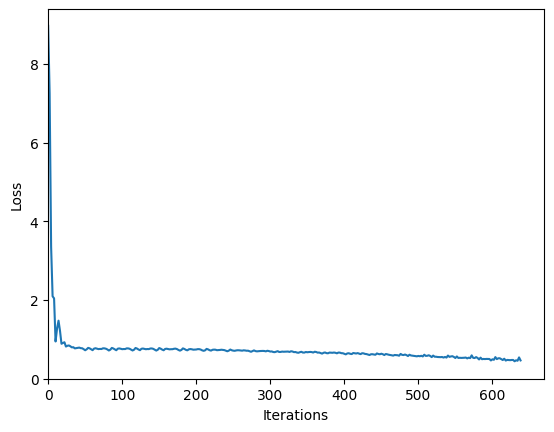

tensor([1.9249, 1.9385, 1.8495, 1.9720, 1.8475, 1.9453, 1.9449, 1.9614, 1.9237,
        2.3370, 4.4986, 3.9646, 3.1734, 3.7611, 4.0287, 1.9052, 1.8355, 2.9838,
        3.4419, 2.7213, 2.7677, 2.6274, 2.8377, 1.9279, 1.9309, 2.1412, 2.2939,
        2.7528, 3.0569, 2.9836, 2.5703, 1.8329, 1.8941, 1.9287, 2.7849, 2.9767,
        3.1733, 2.9485, 2.8653, 1.9336, 1.9246, 2.5118, 2.5098, 2.5928, 3.1460,
        2.6786, 2.9391, 1.9577, 1.9257, 2.9071, 2.9421, 2.9172, 2.5844, 2.9755,
        7.5130, 1.9812, 1.8503, 1.9021, 1.8339, 1.9331, 1.9885, 1.8248, 1.8452,
        1.7922], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.5170570015907288
Cell accuracy: 0.8961980990495247
Perfectness: 0.0
Number of agents accuracy: 0.005002501250625291
Agent location accuracy: 0.9994997498749375
Cell accuracy by type: [-1, 0.9035532994923858, 1.0, 0.8319224653592792, -1, -1, -1, -1, 0.9994897959183674, -1, 0.004502251125562795]
Cell precision by type: [0.0, 1.0, 0.9719723543916924,


100%|██████████| 5/5 [00:12<00:00,  2.49s/it]


Loaded model!


Loaded model!


Loaded model!



 50%|█████     | 2/4 [00:50<00:52, 26.17s/it]

Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  4.30it/s]


Loaded model!


Loaded model!


Loaded model!



100%|██████████| 5/5 [00:01<00:00,  4.27it/s]


Loaded model!


Loaded model!


Loaded model!
Epoch 	 Loss train 	 Loss test
1/60	 1.3737		 1.3770
2/60	 1.2176		 1.2220
3/60	 0.7819		 0.7674
4/60	 0.5467		 0.5327
5/60	 0.4162		 0.3858
6/60	 0.3285		 0.2953
7/60	 0.2982		 0.2690
8/60	 0.2685		 0.2460
9/60	 0.2512		 0.2340
10/60	 0.2360		 0.2243
11/60	 0.2217		 0.2149
12/60	 0.2126		 0.2088
13/60	 0.2015		 0.2011
14/60	 0.1920		 0.1954
15/60	 0.1852		 0.1918
16/60	 0.1805		 0.1902
17/60	 0.1763		 0.1887
18/60	 0.1734		 0.1886
19/60	 0.1675		 0.1856
20/60	 0.1665		 0.1865
21/60	 0.1744		 0.1952
22/60	 0.1607		 0.1839
23/60	 0.1556		 0.1818
24/60	 0.1529		 0.1809
25/60	 0.1516		 0.1808
26/60	 0.1406		 0.1729
27/60	 0.1351		 0.1697
28/60	 0.1301		 0.1667
29/60	 0.1282		 0.1659
30/60	 0.1245		 0.1636
31/60	 0.1212		 0.1617
32/60	 0.1182		 0.1600
33/60	 0.1159		 0.1591
34/60	 0.1134		 0.1573
35/60	 0.1108		 0.1561
36/60	 0.1086		 0.1550
37/60	 0.1075		 0.1549
38/60	 0.1049		 0.1534
39/60	 0.1040		 0.1529
40/60	 0.1010		 0.1511
41/60	 0.1002		 0.1512
42/60	 0.0987		 0.150

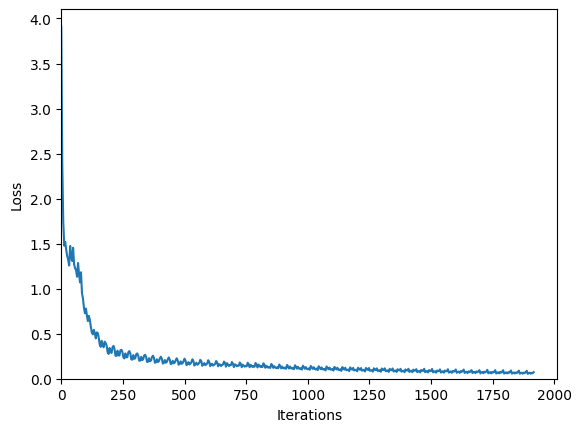


100%|██████████| 5/5 [00:31<00:00,  6.20s/it]


tensor([-0.2620,  0.0745,  0.9588,  0.1869,  0.3554,  0.6830,  0.8098,  0.2312,
         2.3466,  2.7077,  1.9732,  1.7850,  1.3931,  2.0195,  0.0901,  2.9897,
         4.1672,  2.8757,  2.5153,  2.9676,  2.5221,  0.0743,  2.5566,  4.1450,
         3.1227,  3.0654,  3.2649,  1.0107,  0.0047,  2.6770,  3.1692,  2.4542,
         3.0364,  3.4252,  2.8287,  0.0296,  2.1820,  3.3405,  2.7083,  2.2205,
         3.1566,  3.1896,  0.0254,  2.4554,  3.7532,  2.2298,  3.1906,  3.1181,
         3.2500], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.13232435286045074
Cell accuracy: 0.9666976345315514
Perfectness: 0.48124062031015513
Cell accuracy by type: [0.988500127124445, 0.8268876611418048, 0.9565885298133818, 0.9540791029406156, -1, -1, -1, -1, 0.23548387096774193, -1, -1]
Cell precision by type: [0.9913696722436891, 0.8373741141365162, 0.9532800362873505, 0.9775302852676827, 0.0, 0.0, 0.0, 0.0, 0.9733333333333334, 0.0, -1]


Epoch 	 Loss train 	 Loss test
1/60	 1.3993		 1.4083
2/60	 1.2316		 1.2530
3/60	 1.0344		 1.0576
4/60	 0.7330		 0.7521
5/60	 0.5229		 0.5266
6/60	 0.4298		 0.4282
7/60	 0.3705		 0.3656
8/60	 0.3298		 0.3243
9/60	 0.2996		 0.2950
10/60	 0.2751		 0.2730
11/60	 0.2550		 0.2558
12/60	 0.2401		 0.2440
13/60	 0.2266		 0.2329
14/60	 0.2172		 0.2252
15/60	 0.2087		 0.2188
16/60	 0.2020		 0.2136
17/60	 0.1959		 0.2089
18/60	 0.1910		 0.2054
19/60	 0.1874		 0.2028
20/60	 0.1827		 0.1997
21/60	 0.1797		 0.1975
22/60	 0.1762		 0.1951
23/60	 0.1734		 0.1935
24/60	 0.1700		 0.1914
25/60	 0.1664		 0.1891
26/60	 0.1643		 0.1878
27/60	 0.1636		 0.1878
28/60	 0.1589		 0.1849
29/60	 0.1573		 0.1839
30/60	 0.1547		 0.1826
31/60	 0.1501		 0.1794
32/60	 0.1484		 0.1783
33/60	 0.1467		 0.1773
34/60	 0.1441		 0.1759
35/60	 0.1411		 0.1742
36/60	 0.1392		 0.1731
37/60	 0.1371		 0.1722
38/60	 0.1358		 0.1716
39/60	 0.1319		 0.1690
40/60	 0.1291		 0.1673
41/60	 0.1267		 0.1664
42/60	 0.1249		 0.1652
43/60	 0.123

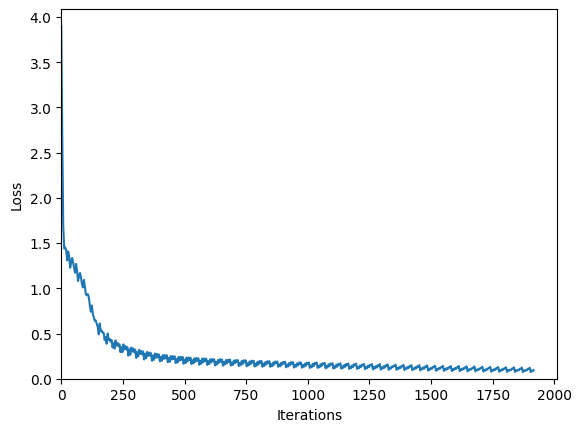

tensor([ 0.3081, -0.4216, -0.0088, -0.2264,  0.7157,  2.9875,  3.8223,  0.1521,
         0.4935, -0.1774,  0.4387,  1.7880,  2.9723,  3.1155,  0.0682,  0.1718,
        -0.6237,  0.0238,  1.4428,  3.0310,  2.7904, -0.0141, -0.1217, -0.3415,
        -0.0578,  1.3661,  2.7530,  1.0460,  0.0152,  0.4776, -0.3560,  0.5402,
         1.7037,  2.7870,  2.8097, -0.0703, -0.4058, -0.4656,  0.2132,  1.5542,
         1.8687,  2.4116, -0.3354, -0.4774, -0.3337,  0.3546,  0.1484,  0.2035,
         0.9624], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.14740467071533203
Cell accuracy: 0.9634715316842094
Perfectness: 0.39419709854927465
Cell accuracy by type: [0.9843799872326844, 0.7665085735133164, 0.9579652242417421, 0.9587873397079535, -1, -1, -1, -1, 0.10030395136778114, -1, -1]
Cell precision by type: [0.9913412086145934, 0.8383878691141261, 0.9513271863649064, 0.9653705500410479, 0.0, 0.0, 0.0, 0.0, 0.9705882352941176, -1, -1]
Epoch 	 Loss train 	 Loss test
1/20	 0.79

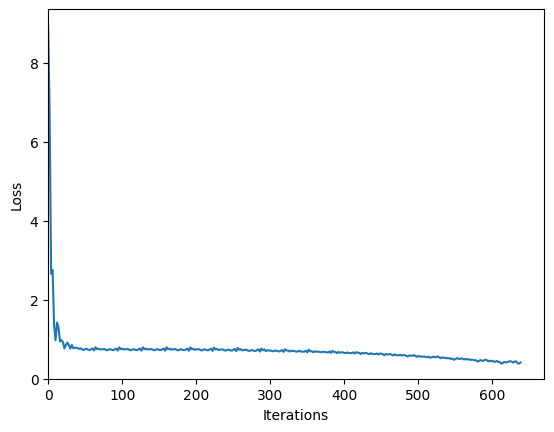

tensor([1.9667, 1.9515, 2.0911, 1.8063, 2.0034, 1.8492, 1.9084, 1.9654, 2.0148,
        0.9148, 2.6664, 2.9628, 2.0855, 2.6289, 3.1110, 1.9145, 1.9590, 2.9752,
        3.6321, 3.2685, 2.6264, 2.9268, 2.2683, 2.0446, 2.0023, 3.2164, 2.9152,
        3.4294, 3.7127, 2.3738, 3.0884, 1.9592, 1.9924, 3.0701, 3.7560, 2.8752,
        3.1302, 4.2983, 2.5446, 1.9650, 1.9706, 4.0840, 1.7961, 3.3997, 3.8005,
        3.1365, 3.6345, 1.9609, 1.9685, 4.5808, 3.9868, 3.3480, 2.8458, 3.2397,
        8.0580, 2.0012, 1.8470, 1.9701, 1.8744, 1.9893, 1.8592, 1.8479, 1.9700,
        2.0053], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.4395456314086914
Cell accuracy: 0.8906015507753877
Perfectness: 0.0
Number of agents accuracy: 0.013006503251625778
Agent location accuracy: 0.9994997498749375
Cell accuracy by type: [-1, 0.9568345323741008, 1.0, 0.8208641152961124, -1, -1, -1, -1, 0.9465104431991849, -1, 0.012506253126563283]
Cell precision by type: [0.0, 1.0, 0.9701865076613742,

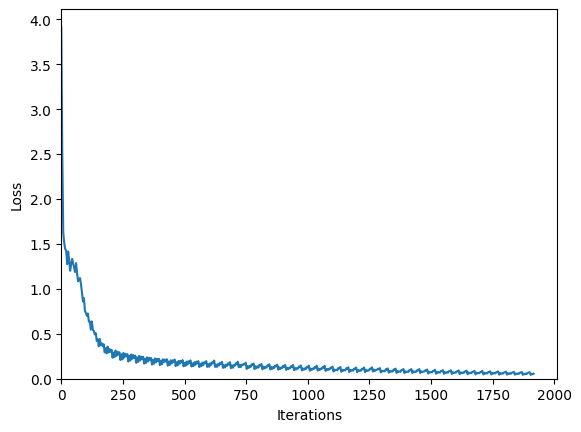


100%|██████████| 5/5 [01:21<00:00, 16.25s/it]


tensor([-0.0781, -0.2438, -0.7051,  0.3552,  2.2032,  2.9545,  3.2261, -0.1460,
        -0.0403, -0.4438,  0.2518,  2.1858,  3.1052,  2.9482, -0.0610,  0.5312,
        -0.0918,  0.2745,  1.8005,  2.9204,  2.7669, -0.1144,  0.0765, -0.5842,
        -0.1650,  2.4510,  2.6253,  1.0080, -0.0742, -0.0280, -0.3902,  0.8498,
         2.8190,  2.9171,  2.2295,  0.0687, -0.2316, -0.1677,  0.3102,  1.4065,
         2.0187,  1.8393,  0.0415,  0.2444,  0.1069, -0.4724,  0.1544,  0.3315,
         0.1119], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.12679365277290344
Cell accuracy: 0.968422987003706
Perfectness: 0.4832416208104052
Cell accuracy by type: [0.9858163102457709, 0.835461510397665, 0.9688256147656293, 0.9574531168927433, -1, -1, -1, -1, 0.30395136778115506, -1, -1]
Cell precision by type: [0.9913537152944952, 0.8900116595413914, 0.9565, 0.9739123878458871, 0.0, 0.0, 0.0, 0.0, 0.970873786407767, -1, -1]


Epoch 	 Loss train 	 Loss test
1/60	 1.3861		 1.3693
2/60	 1.2405		 1.2295
3/60	 1.0610		 1.0481
4/60	 0.7575		 0.7385
5/60	 0.5500		 0.5151
6/60	 0.4632		 0.4168
7/60	 0.3938		 0.3474
8/60	 0.3556		 0.3094
9/60	 0.3249		 0.2819
10/60	 0.2968		 0.2568
11/60	 0.2750		 0.2381
12/60	 0.2584		 0.2258
13/60	 0.2449		 0.2149
14/60	 0.2340		 0.2073
15/60	 0.2249		 0.2015
16/60	 0.2149		 0.1944
17/60	 0.2093		 0.1918
18/60	 0.2014		 0.1864
19/60	 0.1966		 0.1840
20/60	 0.1933		 0.1825
21/60	 0.1884		 0.1800
22/60	 0.1873		 0.1803
23/60	 0.1864		 0.1801
24/60	 0.1778		 0.1737
25/60	 0.1740		 0.1720
26/60	 0.1701		 0.1702
27/60	 0.1677		 0.1696
28/60	 0.1638		 0.1674
29/60	 0.1601		 0.1654
30/60	 0.1574		 0.1643
31/60	 0.1544		 0.1628
32/60	 0.1526		 0.1619
33/60	 0.1501		 0.1607
34/60	 0.1480		 0.1600
35/60	 0.1460		 0.1588
36/60	 0.1430		 0.1573
37/60	 0.1414		 0.1570
38/60	 0.1382		 0.1550
39/60	 0.1353		 0.1538
40/60	 0.1330		 0.1526
41/60	 0.1307		 0.1519
42/60	 0.1277		 0.1503
43/60	 0.125

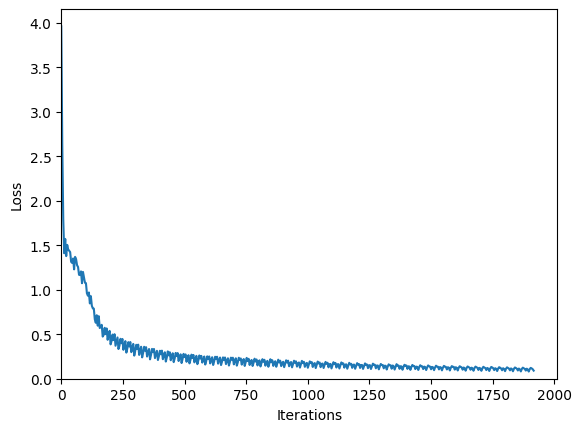

tensor([ 0.0381, -0.0842,  0.5970,  0.7814,  1.7045,  2.5813,  2.9455, -0.1144,
         0.5568,  0.2810,  0.5004,  2.2916,  3.0545,  3.6814, -0.0655,  0.4321,
         0.5525,  0.4208,  1.9208,  2.8074,  2.5628, -0.0585,  0.4509,  0.8072,
         0.5761,  1.8198,  2.9552,  1.0264, -0.0973,  0.5482,  0.4095,  0.6688,
         2.0918,  2.4207,  2.7953,  0.0479,  0.2262,  0.4934,  0.7277,  1.5615,
         2.7652,  2.6423, -0.1989, -0.0469,  0.3085,  0.4381,  2.1915,  3.6528,
         2.4826], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.13837787508964539
Cell accuracy: 0.9643188941409481
Perfectness: 0.352176088044022
Cell accuracy by type: [0.988641936559625, 0.7763256161314414, 0.9528409090909091, 0.9542149511474665, -1, -1, -1, -1, 0.04137931034482756, -1, -1]
Cell precision by type: [0.9915986227250368, 0.8188263095706971, 0.9589981128838566, 0.971956488196266, 0.0, 0.0, 0.0, 0.0, 1.0, -1, -1]
Epoch 	 Loss train 	 Loss test
1/20	 0.7921		 0.8050
2/20	 0

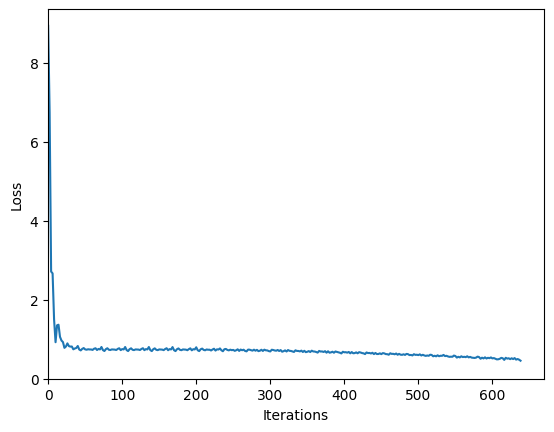

tensor([2.1709, 2.1421, 2.1657, 2.2076, 2.2016, 2.0009, 2.1207, 2.2437, 2.1766,
        1.2900, 4.5154, 4.9860, 2.7217, 3.0214, 3.1519, 2.1510, 2.2093, 3.8909,
        4.2291, 3.2300, 3.9992, 2.4074, 3.6509, 2.1404, 2.2883, 2.9015, 4.0192,
        4.0548, 3.1114, 3.3950, 3.1075, 2.3117, 2.2330, 4.5044, 3.2530, 3.8752,
        3.8650, 3.6881, 2.7159, 2.1478, 2.1054, 3.0734, 3.5276, 3.2983, 3.7733,
        3.0399, 3.1342, 2.0957, 2.2628, 3.6190, 3.6086, 3.2691, 3.5639, 3.2376,
        8.4040, 2.2063, 2.1617, 2.3072, 2.1830, 2.1236, 2.2475, 2.1962, 2.1267,
        2.2855], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.48188620805740356
Cell accuracy: 0.8895932341170585
Perfectness: 0.0
Number of agents accuracy: 0.014007003501750881
Agent location accuracy: 1.0
Cell accuracy by type: [-1, 0.8383733055265902, 1.0, 0.8212063876485279, -1, -1, -1, -1, 0.9838546922300706, -1, 0.014007003501750881]
Cell precision by type: [0.0, 1.0, 0.9800049024757502, 0.99900565304

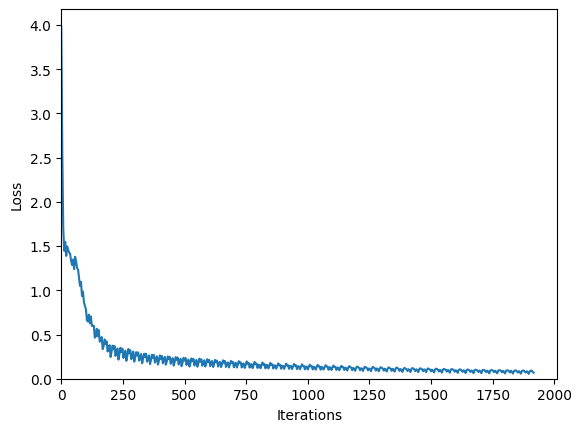


100%|██████████| 5/5 [01:38<00:00, 19.70s/it]


tensor([ 0.1822, -0.1801,  0.2405,  0.8258,  1.1195,  1.7188,  2.0346, -0.0896,
        -0.0631,  0.0548,  0.3023,  1.7993,  2.3325,  2.0403, -0.0286,  0.1117,
        -0.0348,  0.4635,  1.6804,  2.5630,  2.5257,  0.0112,  0.0618, -0.0064,
         0.8652,  2.9928,  1.8095,  0.9306,  0.0067,  0.1876, -0.1034,  0.7347,
         1.9183,  2.1271,  2.0684, -0.0427,  0.0852, -0.2566,  1.0621,  2.6869,
         3.3811,  3.2985, -0.1318,  0.3398, -0.0641,  0.8377,  2.6381,  2.6186,
         2.0141], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.1258726567029953
Cell accuracy: 0.966544496738165
Perfectness: 0.4827413706853426
Cell accuracy by type: [0.9891323538066187, 0.8383121732636296, 0.9575568181818181, 0.9512232068469287, -1, -1, -1, -1, 0.12068965517241381, -1, -1]
Cell precision by type: [0.9915052600530921, 0.8591657099119786, 0.9522006893044804, 0.9751912101564624, 0.0, 0.0, 0.0, 0.0, 0.9459459459459459, -1, -1]


Epoch 	 Loss train 	 Loss test
1/60	 1.3895		 1.3817
2/60	 1.2602		 1.2672
3/60	 1.1131		 1.1319
4/60	 0.8019		 0.8080
5/60	 0.5711		 0.5721
6/60	 0.4453		 0.4306
7/60	 0.3787		 0.3560
8/60	 0.3390		 0.3167
9/60	 0.3072		 0.2896
10/60	 0.2839		 0.2710
11/60	 0.2651		 0.2568
12/60	 0.2484		 0.2450
13/60	 0.2355		 0.2343
14/60	 0.2233		 0.2240
15/60	 0.2139		 0.2170
16/60	 0.2065		 0.2126
17/60	 0.2003		 0.2084
18/60	 0.1949		 0.2049
19/60	 0.1910		 0.2027
20/60	 0.1868		 0.2006
21/60	 0.1833		 0.1987
22/60	 0.1802		 0.1967
23/60	 0.1762		 0.1951
24/60	 0.1734		 0.1943
25/60	 0.1702		 0.1926
26/60	 0.1672		 0.1908
27/60	 0.1647		 0.1906
28/60	 0.1618		 0.1891
29/60	 0.1593		 0.1881
30/60	 0.1569		 0.1868
31/60	 0.1533		 0.1847
32/60	 0.1503		 0.1833
33/60	 0.1482		 0.1826
34/60	 0.1455		 0.1810
35/60	 0.1432		 0.1798
36/60	 0.1406		 0.1787
37/60	 0.1384		 0.1780
38/60	 0.1359		 0.1760
39/60	 0.1340		 0.1755
40/60	 0.1310		 0.1734
41/60	 0.1287		 0.1728
42/60	 0.1264		 0.1714
43/60	 0.124

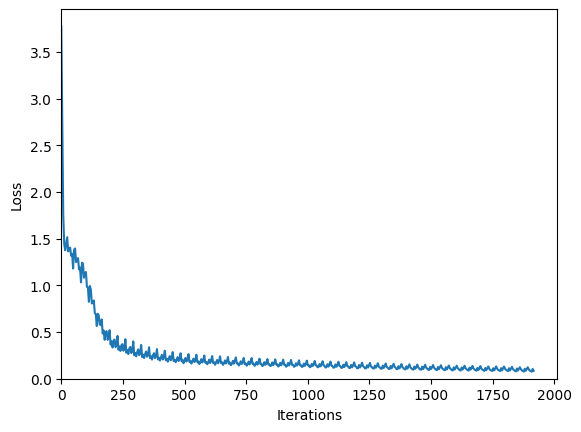

tensor([ 0.2233, -0.0119,  0.5815,  0.3347,  0.2449, -0.3773, -0.6275,  2.1538,
         1.8634,  2.4504,  2.4249,  2.1263,  2.0965,  1.2932,  2.3129,  4.3820,
         3.6184,  3.2944,  3.3646,  3.0340,  3.4726,  2.2967,  3.8420,  2.9715,
         3.2903,  3.3289,  2.5360,  0.9696,  2.2845,  3.6523,  3.5410,  3.1098,
         2.9457,  3.0038,  2.5617,  2.2812,  3.1436,  2.8249,  3.2579,  3.3223,
         3.2658,  3.1089,  2.0502,  3.2219,  3.1583,  3.4526,  3.6837,  3.1370,
         3.6501], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.1544727385044098
Cell accuracy: 0.9618380618880868
Perfectness: 0.3656828414207104
Cell accuracy by type: [0.9842123349976754, 0.779874213836478, 0.9571412606168976, 0.9529697585031547, -1, -1, -1, -1, 0.022950819672131195, -1, -1]
Cell precision by type: [0.9895733826548241, 0.8098348059930849, 0.956393076493579, 0.9687776467118844, 0.0, 0.0, 0.0, 0.0, 0.875, -1, -1]
Epoch 	 Loss train 	 Loss test
1/20	 0.7913		 0.7512
2/20

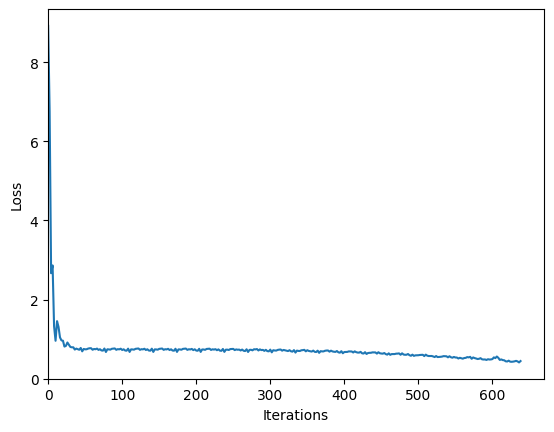

tensor([2.0609, 2.2691, 2.0632, 2.0828, 2.2330, 2.0584, 2.0932, 2.0219, 2.0692,
        0.9288, 3.7211, 3.0431, 2.4473, 1.9975, 2.4654, 2.1124, 2.2286, 3.2039,
        4.1607, 3.1574, 2.5553, 2.5092, 3.6602, 2.1324, 2.0685, 2.9568, 2.7974,
        4.0498, 3.8215, 1.9387, 4.1548, 2.1425, 2.0618, 2.1545, 3.1396, 3.6064,
        2.5594, 3.5234, 4.3136, 2.0144, 2.0232, 3.0774, 2.1000, 2.6578, 2.8134,
        2.9011, 4.2751, 2.1091, 2.2481, 2.8993, 2.4931, 3.1164, 3.1588, 4.0688,
        8.0766, 2.0621, 2.2028, 2.2089, 2.0088, 1.9578, 2.0891, 2.0187, 2.1589,
        2.1120], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.45970386266708374
Cell accuracy: 0.8889053901950975
Perfectness: 0.0
Number of agents accuracy: 0.0
Agent location accuracy: 1.0
Cell accuracy by type: [-1, 0.9524291497975709, 1.0, 0.8177449335811761, -1, -1, -1, -1, 0.966996699669967, -1, 0.0]
Cell precision by type: [0.0, 1.0, 0.9565737528412489, 0.9989846028874202, 0.0, 0.0, 0.0, 0.0, 0.919937

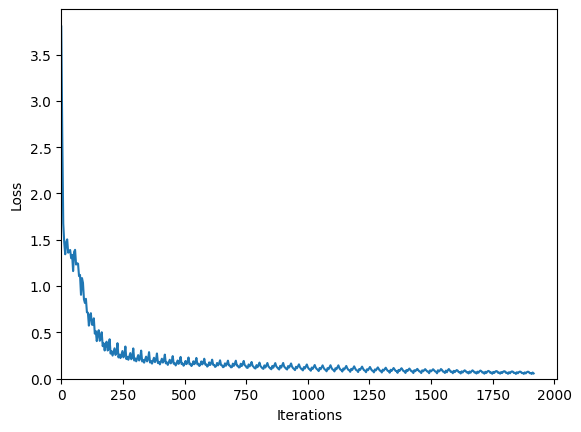


100%|██████████| 5/5 [01:42<00:00, 20.47s/it]


tensor([ 0.1070, -0.1437,  0.0927,  0.1725, -0.0162, -0.1099,  0.2889,  2.0663,
         2.6891,  1.4613,  1.8469,  1.8212,  1.9707,  1.3148,  1.8622,  5.5484,
         2.6929,  2.8047,  2.8023,  2.8143,  2.0974,  1.8179,  2.8270,  2.3830,
         3.0145,  3.3574,  2.3245,  0.9131,  1.8525,  2.5862,  2.7575,  2.9519,
         2.9518,  2.6950,  3.4417,  1.8262,  2.9264,  2.7179,  2.7934,  2.6107,
         2.9536,  3.1032,  1.8784,  3.2815,  2.9456,  3.2779,  2.8778,  2.8027,
         1.9512], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.13505244255065918
Cell accuracy: 0.9652070933425897
Perfectness: 0.46873436718359185
Cell accuracy by type: [0.9868604580646465, 0.830928597854236, 0.9608292355833706, 0.9515555877873667, -1, -1, -1, -1, 0.13442622950819672, -1, -1]
Cell precision by type: [0.9894005107210896, 0.8718944099378882, 0.954535361385589, 0.9728266913809083, 0.0, 0.0, 0.0, 0.0, 0.9761904761904762, 0.0, -1]


Epoch 	 Loss train 	 Loss test
1/60	 1.3744		 1.4015
2/60	 1.2342		 1.2680
3/60	 1.0603		 1.0892
4/60	 0.7919		 0.7974
5/60	 0.5831		 0.5709
6/60	 0.4744		 0.4462
7/60	 0.4147		 0.3826
8/60	 0.3670		 0.3353
9/60	 0.3325		 0.3041
10/60	 0.3043		 0.2802
11/60	 0.2808		 0.2604
12/60	 0.2624		 0.2469
13/60	 0.2483		 0.2381
14/60	 0.2374		 0.2318
15/60	 0.2267		 0.2250
16/60	 0.2175		 0.2194
17/60	 0.2101		 0.2160
18/60	 0.2042		 0.2135
19/60	 0.1981		 0.2106
20/60	 0.1930		 0.2082
21/60	 0.1890		 0.2064
22/60	 0.1848		 0.2043
23/60	 0.1816		 0.2031
24/60	 0.1780		 0.2019
25/60	 0.1743		 0.1998
26/60	 0.1718		 0.1988
27/60	 0.1682		 0.1967
28/60	 0.1653		 0.1961
29/60	 0.1618		 0.1938
30/60	 0.1585		 0.1923
31/60	 0.1556		 0.1909
32/60	 0.1530		 0.1901
33/60	 0.1503		 0.1886
34/60	 0.1479		 0.1879
35/60	 0.1448		 0.1860
36/60	 0.1429		 0.1854
37/60	 0.1404		 0.1845
38/60	 0.1375		 0.1828
39/60	 0.1356		 0.1823
40/60	 0.1343		 0.1818
41/60	 0.1311		 0.1803
42/60	 0.1287		 0.1789
43/60	 0.127

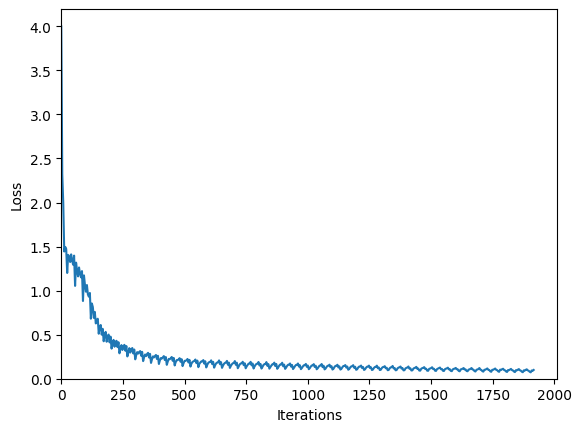

tensor([-0.1416,  0.1181,  2.1868,  3.1707,  2.4162,  2.6564,  3.0788, -0.1946,
        -0.3670,  1.8264,  3.0477,  2.9309,  2.6589,  3.4323,  0.0101, -0.1827,
         1.9831,  3.1881,  2.5582,  2.3686,  3.0998,  0.0204,  0.0643,  1.8809,
         2.6714,  3.6958,  3.1853,  0.9008,  0.0606,  0.1181,  2.0202,  2.5835,
         2.1136,  1.5760,  1.7765,  0.1567,  0.1445,  0.6283, -0.0856,  0.4447,
         0.5587,  0.9838, -0.0535, -0.1648,  0.2629, -0.1507,  0.3980,  0.8060,
         1.1386], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.16088972985744476
Cell accuracy: 0.9599901991812233
Perfectness: 0.3621810905452726
Cell accuracy by type: [0.9838462609664392, 0.7886029411764706, 0.9507845129247093, 0.948889136159638, -1, -1, -1, -1, 0.010526315789473717, -1, -1]
Cell precision by type: [0.9901099121103526, 0.7774555998550199, 0.9543935187808056, 0.968869532285552, 0.0, 0.0, 0.0, 0.0, 1.0, -1, -1]
Epoch 	 Loss train 	 Loss test
1/20	 0.7854		 0.7650
2/20	

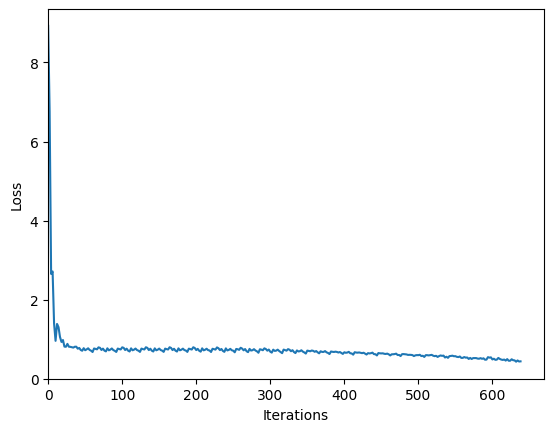

tensor([1.8552, 1.9600, 1.8966, 1.9470, 1.9199, 1.8925, 1.8615, 1.8343, 1.8854,
        1.5655, 3.1076, 2.6325, 3.4035, 2.7373, 3.1649, 1.8668, 1.8314, 3.1602,
        2.6462, 2.7449, 2.6374, 2.7851, 2.6567, 1.7761, 1.8842, 2.7820, 2.2924,
        2.7722, 3.4191, 2.6062, 2.9948, 1.8898, 1.9752, 2.1770, 3.0880, 3.4847,
        3.0150, 4.3862, 3.1240, 1.8591, 1.8147, 2.6766, 2.8446, 2.2468, 4.0541,
        3.2666, 5.2475, 1.8693, 1.9067, 3.4040, 2.6952, 3.0459, 2.0518, 3.2262,
        7.6243, 1.9564, 1.8306, 1.9025, 1.8934, 1.8491, 1.8375, 1.9989, 1.8583,
        1.8223], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.4672842025756836
Cell accuracy: 0.8911799649824912
Perfectness: 0.0
Number of agents accuracy: 0.0
Agent location accuracy: 1.0
Cell accuracy by type: [-1, 0.942366026289181, 1.0, 0.823546318146064, -1, -1, -1, -1, 0.9233634912187334, -1, 0.0]
Cell precision by type: [0.0, 1.0, 0.9778818267584471, 0.9989724582102424, 0.0, 0.0, 0.0, 0.0, 0.96015495

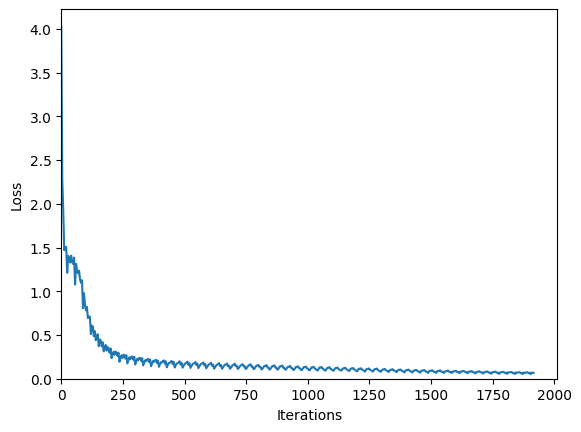


100%|██████████| 5/5 [01:32<00:00, 18.49s/it]


tensor([-0.0290, -0.3187,  1.8825,  2.1805,  2.5858,  2.4781,  2.6608, -0.1509,
        -0.1122,  1.2782,  2.2235,  2.3694,  2.5804,  2.6158,  0.0070,  0.0160,
         1.2046,  2.3498,  2.0158,  2.0493,  2.9464,  0.0140, -0.3414,  1.5790,
         2.4602,  3.5613,  3.0872,  0.7677,  0.0041,  0.1193,  1.3370,  1.7877,
         1.9146,  1.9664,  1.9264,  0.0659,  0.1947,  0.8266, -0.0681,  0.6090,
         0.6082,  1.3434,  0.0681,  0.0719, -0.4513,  0.0256, -0.1206,  0.0743,
        -0.0745], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.15093538165092468
Cell accuracy: 0.9609702810588968
Perfectness: 0.45122561280640316
Cell accuracy by type: [0.9836672170608948, 0.8334558823529412, 0.9472288068630771, 0.949074589221468, -1, -1, -1, -1, 0.15438596491228074, -1, -1]
Cell precision by type: [0.9900883041989548, 0.8044712562100781, 0.951740954973347, 0.9655849056603774, 0.0, 0.0, 0.0, 0.0, 0.9777777777777777, -1, -1]


Epoch 	 Loss train 	 Loss test
1/60	 1.3761		 1.3588
2/60	 1.2249		 1.2214
3/60	 1.0148		 1.0119
4/60	 0.7237		 0.7173
5/60	 0.5295		 0.5145
6/60	 0.4325		 0.4180
7/60	 0.3720		 0.3582
8/60	 0.3319		 0.3198
9/60	 0.3003		 0.2939
10/60	 0.2757		 0.2751
11/60	 0.2579		 0.2612
12/60	 0.2433		 0.2518
13/60	 0.2314		 0.2431
14/60	 0.2222		 0.2370
15/60	 0.2146		 0.2317
16/60	 0.2088		 0.2277
17/60	 0.2015		 0.2227
18/60	 0.1968		 0.2197
19/60	 0.1931		 0.2174
20/60	 0.1876		 0.2146
21/60	 0.1869		 0.2142
22/60	 0.1799		 0.2094
23/60	 0.1783		 0.2087
24/60	 0.1760		 0.2075
25/60	 0.1730		 0.2054
26/60	 0.1717		 0.2046
27/60	 0.1653		 0.2004
28/60	 0.1586		 0.1965
29/60	 0.1561		 0.1954
30/60	 0.1540		 0.1939
31/60	 0.1519		 0.1933
32/60	 0.1498		 0.1921
33/60	 0.1471		 0.1907
34/60	 0.1446		 0.1890
35/60	 0.1419		 0.1876
36/60	 0.1395		 0.1859
37/60	 0.1379		 0.1855
38/60	 0.1357		 0.1841
39/60	 0.1335		 0.1830
40/60	 0.1312		 0.1816
41/60	 0.1287		 0.1796
42/60	 0.1270		 0.1795
43/60	 0.123

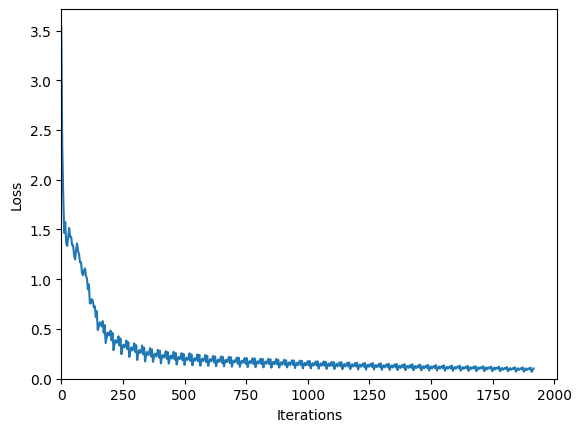

tensor([-0.1896,  0.0512, -0.4314,  1.6858,  2.6156,  2.8774,  2.6693, -0.2189,
         0.1750, -0.0908,  1.6115,  2.6471,  2.6735,  2.4082, -0.2357, -0.1269,
        -0.2133,  2.1044,  2.3753,  2.8707,  2.6896, -0.3663, -0.2297,  0.0227,
         1.6191,  1.7172,  3.3696,  0.9821, -0.2049, -0.0863, -0.3872,  1.6914,
         2.2572,  3.9397,  3.7058, -0.0717, -0.1771,  0.2387,  0.9971,  1.7354,
         1.5004,  1.2784, -0.1054, -0.0099,  0.0818,  0.1803,  0.6927,  0.1333,
         0.4141], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.15891899168491364
Cell accuracy: 0.96441077681698
Perfectness: 0.4142071035517759
Cell accuracy by type: [0.9843379212149976, 0.7921554252199413, 0.9637215075603701, 0.9563435361359706, -1, -1, -1, -1, 0.041543026706231445, -1, -1]
Cell precision by type: [0.9923049320202544, 0.856520015854142, 0.958960251515832, 0.9702067597467002, 0.0, 0.0, 0.0, 0.0, 1.0, -1, -1]
Epoch 	 Loss train 	 Loss test
1/20	 0.8070		 0.8077
2/20	 0

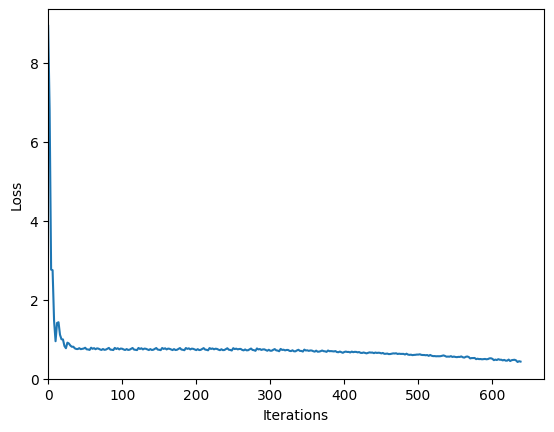

tensor([1.9794, 2.0538, 2.0041, 2.0866, 2.0088, 2.0124, 2.0781, 1.9651, 2.0009,
        0.7661, 3.4176, 1.9924, 3.2274, 3.6241, 3.1231, 1.9686, 2.0136, 3.7784,
        3.2708, 3.9832, 4.1528, 3.3845, 3.4900, 1.9690, 2.0664, 3.1219, 4.1721,
        2.9301, 3.4841, 5.0951, 3.0418, 2.0963, 2.1307, 2.7714, 2.8998, 3.5965,
        3.3950, 2.5639, 3.6165, 1.9778, 2.0666, 3.0437, 3.1342, 2.9875, 2.6893,
        2.9684, 3.1451, 2.0276, 2.0232, 2.8621, 3.2818, 3.5669, 3.0395, 2.7804,
        8.1164, 2.0104, 2.0243, 1.9984, 2.0019, 2.0368, 2.0507, 2.0067, 1.9776,
        2.0638], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.4537126123905182
Cell accuracy: 0.8878032766383191
Perfectness: 0.0
Number of agents accuracy: 0.0
Agent location accuracy: 1.0
Cell accuracy by type: [-1, 0.9334708612686952, 1.0, 0.8155045802104626, -1, -1, -1, -1, 0.9793033821302373, -1, 0.0]
Cell precision by type: [0.0, 1.0, 0.9739003340757239, 0.9989798757303162, 0.0, 0.0, 0.0, 0.0, 0.963735

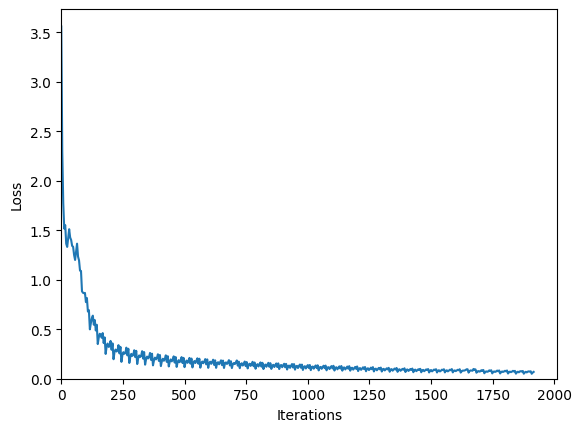


100%|██████████| 5/5 [01:29<00:00, 17.83s/it]


tensor([ 0.0779, -0.2325,  0.6522,  1.6165,  2.4776,  2.3416,  2.6112, -0.0373,
        -0.0202,  0.3082,  2.2867,  2.6255,  2.5466,  2.9762, -0.0550,  0.1159,
         0.7243,  2.1757,  2.5952,  2.5287,  2.5338,  0.0039,  0.0042,  0.7929,
         1.8115,  2.7576,  2.3367,  0.8862, -0.0776, -0.0791,  0.2856,  3.0721,
         2.4479,  2.3681,  2.8982, -0.0707, -0.0723,  0.6405,  0.6728,  1.5391,
         1.6014,  1.7964,  0.0241, -0.2020, -0.2491, -0.2579,  0.1595,  0.1879,
         0.2945], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.14087042212486267
Cell accuracy: 0.9637880164572082
Perfectness: 0.47123561780890444
Cell accuracy by type: [0.984515899383009, 0.8332111436950147, 0.9533401038140374, 0.9552530646010379, -1, -1, -1, -1, 0.13353115727002962, -1, -1]
Cell precision by type: [0.9920097238273622, 0.7997888810696693, 0.9500702839471464, 0.9733706272270968, 0.0, 0.0, 0.0, 0.0, 0.9183673469387755, 0.0, -1]


Epoch 	 Loss train 	 Loss test
1/60	 1.3842		 1.3625
2/60	 1.2408		 1.2282
3/60	 1.0853		 1.0725
4/60	 0.8167		 0.8051
5/60	 0.6055		 0.5913
6/60	 0.4443		 0.4334
7/60	 0.3777		 0.3623
8/60	 0.3384		 0.3237
9/60	 0.3078		 0.2962
10/60	 0.2830		 0.2756
11/60	 0.2633		 0.2603
12/60	 0.2488		 0.2501
13/60	 0.2362		 0.2412
14/60	 0.2233		 0.2319
15/60	 0.2131		 0.2248
16/60	 0.2052		 0.2197
17/60	 0.1986		 0.2159
18/60	 0.1933		 0.2124
19/60	 0.1880		 0.2096
20/60	 0.1842		 0.2079
21/60	 0.1812		 0.2063
22/60	 0.1796		 0.2056
23/60	 0.1746		 0.2030
24/60	 0.1699		 0.2005
25/60	 0.1674		 0.1999
26/60	 0.1642		 0.1978
27/60	 0.1611		 0.1963
28/60	 0.1581		 0.1951
29/60	 0.1558		 0.1940
30/60	 0.1527		 0.1924
31/60	 0.1497		 0.1904
32/60	 0.1474		 0.1892
33/60	 0.1447		 0.1880
34/60	 0.1420		 0.1868
35/60	 0.1396		 0.1857
36/60	 0.1376		 0.1845
37/60	 0.1358		 0.1838
38/60	 0.1340		 0.1831
39/60	 0.1313		 0.1816
40/60	 0.1289		 0.1799
41/60	 0.1269		 0.1791
42/60	 0.1242		 0.1773
43/60	 0.122

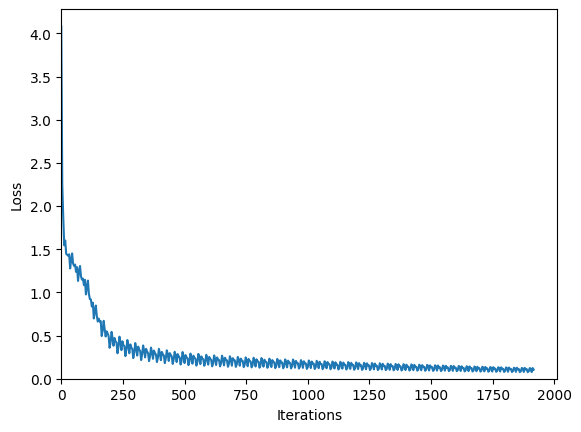

tensor([ 1.8782e-01,  5.0460e-01, -3.2864e-03,  4.3814e-01,  2.4010e+00,
         2.7473e+00,  2.8536e+00, -3.6470e-02,  1.0694e-01, -1.9396e-01,
         8.6670e-01,  2.0295e+00,  2.6534e+00,  2.5138e+00,  9.5962e-02,
         2.6382e-01, -4.5152e-03,  8.1350e-01,  1.8636e+00,  2.8086e+00,
         3.3402e+00,  9.2141e-02,  1.0961e-02,  1.5540e-01,  6.2228e-01,
         2.6885e+00,  2.5427e+00,  9.6533e-01,  1.5310e-02,  3.6165e-02,
        -1.3519e-02,  6.7200e-01,  1.5768e+00,  1.3579e+00,  2.1190e+00,
        -1.4497e-01,  3.1053e-01,  1.4676e-01,  8.1426e-02, -4.4872e-02,
         7.4668e-01,  1.6528e-01,  1.2271e-01,  1.6319e-01,  2.8629e-01,
         6.4552e-01,  3.0625e-01,  6.3604e-01, -5.1069e-01],
       grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.16114571690559387
Cell accuracy: 0.9609396535002195
Perfectness: 0.33116558279139574
Cell accuracy by type: [0.9856591501283232, 0.7798331519767864, 0.956822695035461, 0.9445481916231564, -1, -1, -1, -

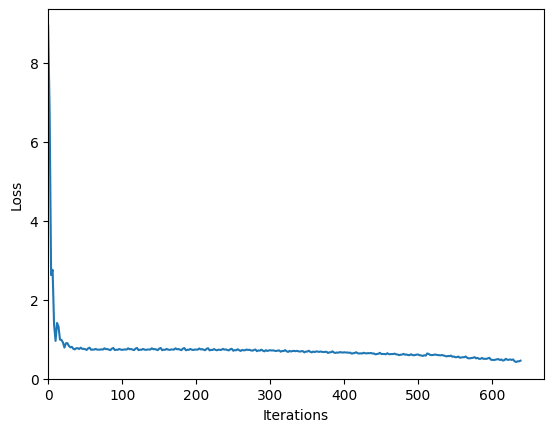

tensor([1.8866, 2.0484, 1.9388, 1.9419, 1.9193, 1.9075, 1.9459, 1.9321, 1.9142,
        1.3891, 4.7200, 6.2453, 3.8652, 3.0464, 3.0392, 1.9088, 2.1841, 2.6528,
        2.2976, 2.6508, 2.6095, 2.5351, 2.7281, 1.9723, 2.2082, 2.8109, 3.4584,
        2.5832, 2.8588, 2.9937, 3.6450, 2.2199, 1.9312, 3.5286, 2.9156, 3.0299,
        3.2471, 3.4587, 2.6201, 1.9941, 1.9612, 3.9138, 2.7343, 3.0671, 2.9861,
        2.7454, 3.3726, 1.9456, 2.0338, 3.6495, 2.8348, 2.5077, 3.3029, 2.6976,
        7.7993, 2.1120, 2.0272, 1.8871, 1.9394, 1.9041, 1.9613, 1.9200, 2.0441,
        1.9101], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.47010934352874756
Cell accuracy: 0.8986446348174087
Perfectness: 0.0
Number of agents accuracy: 0.007503751875937992
Agent location accuracy: 1.0
Cell accuracy by type: [-1, 0.8983589200635257, 1.0, 0.8375270460425777, -1, -1, -1, -1, 0.9732997481108312, -1, 0.007503751875937992]
Cell precision by type: [0.0, 1.0, 0.9815344147303814, 0.99841272704

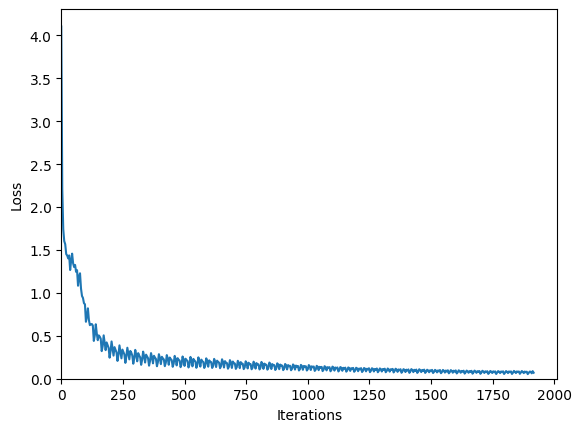


100%|██████████| 5/5 [01:30<00:00, 18.02s/it]


tensor([-0.0249,  0.1798,  0.2264,  0.4648,  1.8076,  3.1727,  3.0784,  0.0618,
         0.1778,  0.0159,  0.8140,  1.5572,  2.4897,  2.9511,  0.0346,  0.2964,
        -0.1983,  0.7203,  1.5373,  2.6543,  2.6844, -0.0079,  0.0695,  0.1026,
         0.3916,  2.0236,  2.1121,  0.9143, -0.0546,  0.2354, -0.3953,  0.6166,
         1.8315,  1.4312,  1.6445, -0.0374, -0.1674, -0.2295, -0.2318, -0.2101,
         0.0482,  0.7630,  0.1139,  0.1087, -0.1052,  0.1098, -0.3734, -0.1359,
         0.0555], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.15759681165218353
Cell accuracy: 0.9596430868495472
Perfectness: 0.39369684842421215
Cell accuracy by type: [0.9861489332523559, 0.8248095756256801, 0.9493333333333334, 0.9370783947558977, -1, -1, -1, -1, 0.23693379790940772, -1, -1]
Cell precision by type: [0.9868449428509812, 0.7879417879417879, 0.9427541131395086, 0.9758691855850135, 0.0, 0.0, 0.0, 0.0, 0.9577464788732395, -1, -1]


Epoch 	 Loss train 	 Loss test
1/60	 1.3760		 1.3494
2/60	 1.2381		 1.2250
3/60	 1.0242		 1.0114
4/60	 0.7099		 0.6921
5/60	 0.5311		 0.4995
6/60	 0.4331		 0.3933
7/60	 0.3807		 0.3370
8/60	 0.3496		 0.3069
9/60	 0.3206		 0.2813
10/60	 0.2939		 0.2594
11/60	 0.2719		 0.2421
12/60	 0.2570		 0.2308
13/60	 0.2432		 0.2215
14/60	 0.2321		 0.2141
15/60	 0.2228		 0.2081
16/60	 0.2145		 0.2030
17/60	 0.2083		 0.1992
18/60	 0.2025		 0.1960
19/60	 0.1972		 0.1939
20/60	 0.1932		 0.1924
21/60	 0.1891		 0.1899
22/60	 0.1859		 0.1887
23/60	 0.1829		 0.1876
24/60	 0.1795		 0.1860
25/60	 0.1765		 0.1849
26/60	 0.1743		 0.1844
27/60	 0.1708		 0.1828
28/60	 0.1685		 0.1824
29/60	 0.1666		 0.1813
30/60	 0.1641		 0.1805
31/60	 0.1612		 0.1794
32/60	 0.1586		 0.1781
33/60	 0.1557		 0.1773
34/60	 0.1526		 0.1760
35/60	 0.1510		 0.1754
36/60	 0.1484		 0.1746
37/60	 0.1462		 0.1735
38/60	 0.1441		 0.1726
39/60	 0.1418		 0.1716
40/60	 0.1396		 0.1707
41/60	 0.1369		 0.1696
42/60	 0.1337		 0.1683
43/60	 0.132

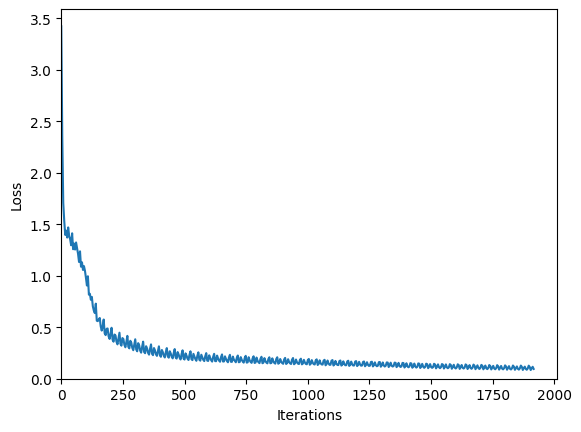

tensor([ 1.6684e-01,  2.6764e-02, -4.0637e-01,  3.8260e-01,  1.5872e+00,
         2.7511e+00,  2.7443e+00,  1.2227e-01,  2.3972e-01, -3.5147e-01,
         2.1124e-01,  2.1776e+00,  2.5186e+00,  2.5558e+00, -4.2515e-04,
        -8.0688e-03, -2.2554e-01,  1.6467e-01,  1.8008e+00,  2.6766e+00,
         3.1341e+00,  4.3789e-02, -3.8590e-01, -3.1775e-01,  2.2976e-02,
         2.5597e+00,  2.7143e+00,  9.8013e-01,  6.5443e-02,  2.7417e-02,
        -3.7136e-01,  2.4785e-01,  1.9527e+00,  2.6762e+00,  2.6161e+00,
         2.2669e-01,  1.2822e-03, -4.1668e-01,  2.2667e-01,  1.0373e+00,
         1.9387e+00,  1.7250e+00,  6.9967e-02, -9.2727e-02, -4.2693e-01,
        -2.4765e-01, -1.1509e-01,  7.8704e-02, -5.3418e-01],
       grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.15552155673503876
Cell accuracy: 0.9606946330308012
Perfectness: 0.32816408204102054
Cell accuracy by type: [0.9869086170128741, 0.7593345656192236, 0.9479827742520399, 0.9488744896812614, -1, -1, -1, 

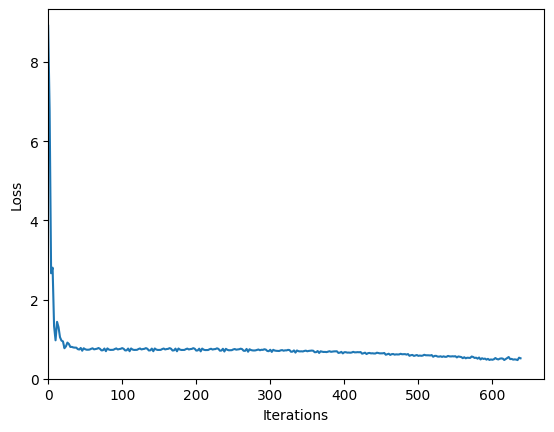

tensor([2.0218, 1.9524, 2.0270, 2.0764, 1.8193, 1.9179, 1.9476, 1.9985, 1.8658,
        0.9493, 3.3776, 4.0050, 3.8101, 3.4473, 2.8590, 2.0657, 1.9522, 3.1066,
        3.3315, 3.5029, 4.6205, 2.6758, 3.1523, 1.9778, 1.9117, 3.3582, 3.8635,
        3.6009, 2.3699, 2.4163, 3.1061, 2.0685, 1.9155, 2.7659, 2.5852, 2.2923,
        2.6790, 2.6792, 3.1339, 1.9440, 1.9535, 2.7071, 2.9144, 2.3044, 2.9501,
        3.6964, 3.4612, 1.9667, 2.0396, 3.2630, 3.1065, 2.9301, 2.9274, 3.2064,
        7.8189, 1.9165, 1.9449, 1.8919, 2.0306, 1.9434, 1.8848, 1.8802, 1.9206,
        1.8321], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.4974108934402466
Cell accuracy: 0.8873655577788895
Perfectness: 0.0
Number of agents accuracy: 0.0
Agent location accuracy: 1.0
Cell accuracy by type: [-1, 0.7351574599896747, 1.0, 0.8202752418585638, -1, -1, -1, -1, 0.9863429438543247, -1, 0.0]
Cell precision by type: [0.0, 1.0, 0.9741376309652268, 0.9982128710135048, 0.0, 0.0, 0.0, 0.0, 0.994897

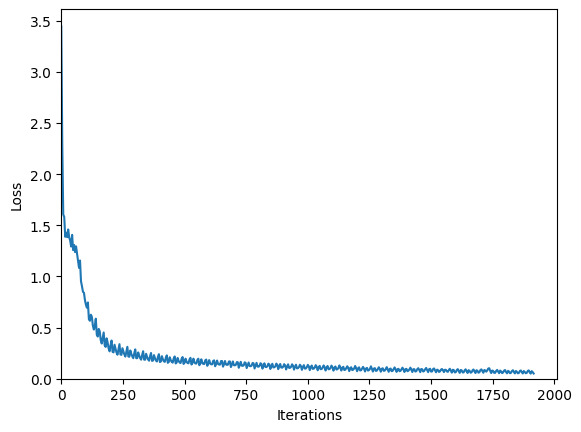


100%|██████████| 5/5 [01:27<00:00, 17.59s/it]


tensor([ 0.0817,  0.2953, -0.3947, -0.0954,  1.7652,  3.4383,  3.1331,  0.0650,
         0.1394, -0.0924,  0.2577,  1.8458,  2.4702,  2.7854,  0.0823, -0.0812,
        -0.0526,  0.0226,  1.9905,  2.8817,  3.1859,  0.1607, -0.2691, -0.2602,
         0.3742,  1.7929,  2.6619,  0.8934,  0.1164, -0.0964, -0.1619,  0.2091,
         1.6215,  2.3134,  2.9022,  0.0502,  0.2081,  0.2256,  0.1907,  0.8029,
         1.8399,  1.7227,  0.1914,  0.3658,  0.3365, -0.6081,  0.5283,  1.5999,
         0.6033], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.13505184650421143
Cell accuracy: 0.9630427458627273
Perfectness: 0.37768884442221107
Cell accuracy by type: [0.9866321775531158, 0.8081330868761553, 0.9543291024478695, 0.9480130341960373, -1, -1, -1, -1, 0.0980392156862745, -1, -1]
Cell precision by type: [0.9916645166411971, 0.8643732700672202, 0.9542209631728046, 0.9688050218173467, 0.0, 0.0, 0.0, 0.0, 0.9259259259259259, 0.0, -1]


Epoch 	 Loss train 	 Loss test
1/60	 1.3887		 1.3737
2/60	 1.2368		 1.2433
3/60	 1.0790		 1.0941
4/60	 0.8365		 0.8543
5/60	 0.5923		 0.5959
6/60	 0.4654		 0.4641
7/60	 0.4000		 0.3967
8/60	 0.3566		 0.3537
9/60	 0.3288		 0.3283
10/60	 0.3047		 0.3076
11/60	 0.2831		 0.2890
12/60	 0.2680		 0.2764
13/60	 0.2544		 0.2660
14/60	 0.2397		 0.2544
15/60	 0.2293		 0.2463
16/60	 0.2207		 0.2403
17/60	 0.2141		 0.2358
18/60	 0.2075		 0.2308
19/60	 0.2031		 0.2281
20/60	 0.2001		 0.2264
21/60	 0.1940		 0.2229
22/60	 0.1891		 0.2196
23/60	 0.1839		 0.2161
24/60	 0.1810		 0.2146
25/60	 0.1770		 0.2126
26/60	 0.1731		 0.2098
27/60	 0.1694		 0.2083
28/60	 0.1654		 0.2057
29/60	 0.1624		 0.2043
30/60	 0.1590		 0.2028
31/60	 0.1554		 0.2010
32/60	 0.1526		 0.1995
33/60	 0.1499		 0.1984
34/60	 0.1467		 0.1968
35/60	 0.1440		 0.1957
36/60	 0.1416		 0.1942
37/60	 0.1392		 0.1936
38/60	 0.1368		 0.1924
39/60	 0.1338		 0.1910
40/60	 0.1314		 0.1894
41/60	 0.1290		 0.1884
42/60	 0.1271		 0.1876
43/60	 0.125

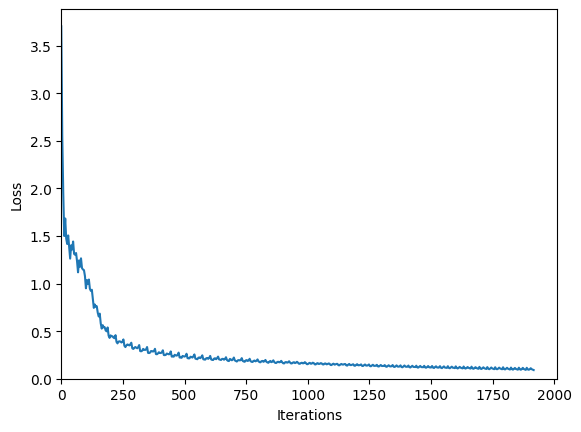

tensor([ 0.0568,  0.3331,  0.8178,  2.0672,  2.9131,  2.8743,  3.0733,  0.0295,
         0.2048,  0.8526,  2.4147,  2.8695,  2.6605,  2.7619,  0.0201,  0.0311,
         0.8838,  1.7315,  2.6217,  2.6020,  2.2207,  0.0919,  0.3109,  0.1736,
         1.9838,  2.6988,  2.9520,  0.9555,  0.0304,  0.0957,  0.7371,  1.2086,
         3.5851,  2.6006,  2.1858,  0.0472, -0.1238,  0.7675,  1.4488,  2.6079,
         2.3541,  1.8334,  0.0469,  0.1460,  0.5289,  0.2086,  0.6460,  0.3251,
         0.5062], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.16950887441635132
Cell accuracy: 0.9564782391195598
Perfectness: 0.25862931465732864
Cell accuracy by type: [0.9846468160854438, 0.7586584032081662, 0.9505304299274149, 0.9417733488507419, -1, -1, -1, -1, 0.030054644808743203, -1, -1]
Cell precision by type: [0.990658580267014, 0.8199369582348306, 0.9545811371537513, 0.9642883741714456, 0.0, 0.0, 0.0, 0.0, 0.9166666666666666, -1, -1]
Epoch 	 Loss train 	 Loss test
1/20	 0.79

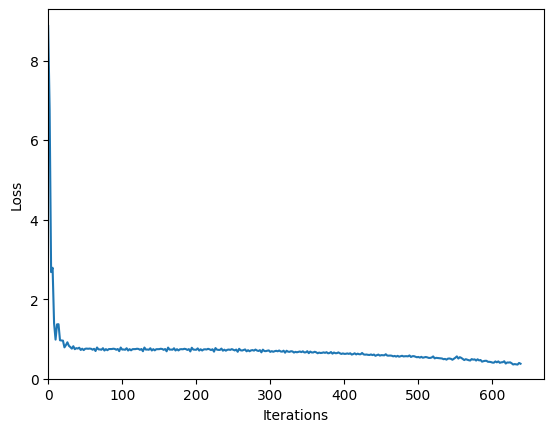

tensor([1.9108, 1.9150, 2.0358, 2.0442, 2.0128, 1.9490, 2.0006, 2.0154, 1.9845,
        0.9050, 2.8338, 2.8020, 2.5846, 2.7659, 3.2444, 1.9547, 2.0097, 2.8053,
        3.4789, 2.4746, 2.5083, 2.9417, 2.3953, 1.9882, 2.0026, 2.6016, 3.7741,
        3.2948, 2.9805, 2.4174, 3.3210, 1.9728, 2.0203, 3.0010, 3.3653, 4.1639,
        2.7377, 3.0648, 3.3424, 2.0478, 1.9348, 2.8821, 4.3663, 3.4085, 3.3634,
        3.6243, 3.5151, 1.8866, 2.0048, 3.7783, 3.3977, 3.8821, 2.9215, 2.5846,
        8.1714, 1.9729, 1.9323, 2.0230, 1.9343, 2.0762, 2.0572, 1.9367, 1.8939,
        2.0256], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.4044867753982544
Cell accuracy: 0.8975972361180591
Perfectness: 0.0
Number of agents accuracy: 0.002501250625312701
Agent location accuracy: 1.0
Cell accuracy by type: [-1, 0.9583544946673438, 1.0, 0.8331667726598225, -1, -1, -1, -1, 0.996417604912999, -1, 0.002501250625312701]
Cell precision by type: [0.0, 1.0, 0.9604969626248413, 0.9990377108411

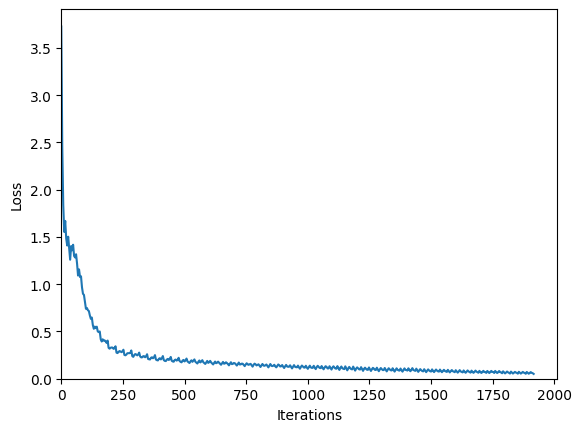


100%|██████████| 5/5 [01:22<00:00, 16.56s/it]


tensor([ 0.2320,  0.1887,  0.0246,  2.7116,  2.9221,  3.1705,  2.8351,  0.1654,
         0.3330,  0.4370,  2.0904,  2.2581,  3.7661,  4.0884,  0.1530, -0.5426,
        -0.2051,  1.7731,  2.5100,  3.4184,  2.9271,  0.2123, -0.1393,  0.0717,
         2.1647,  2.9961,  2.9709,  1.0736,  0.3283, -0.5013,  0.5159,  0.5921,
         3.2412,  2.1398,  2.2646,  0.0311, -0.0875, -0.1849,  2.2817,  1.8434,
         1.9821,  2.3876,  0.0459, -0.8952,  0.1441, -0.4612,  0.0131,  0.0737,
        -0.5622], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.14831353724002838
Cell accuracy: 0.9643699400720769
Perfectness: 0.4217108554277138
Cell accuracy by type: [0.9850109232138523, 0.8333940940576012, 0.9620323841429369, 0.9520293860925225, -1, -1, -1, -1, 0.1994535519125683, -1, -1]
Cell precision by type: [0.9903597795358864, 0.8533034714445689, 0.9588736156714341, 0.9749348230912477, 0.0, 0.0, 0.0, 0.0, 0.948051948051948, -1, -1]


Epoch 	 Loss train 	 Loss test
1/60	 1.3746		 1.3569
2/60	 1.2194		 1.2206
3/60	 0.9995		 1.0037
4/60	 0.7093		 0.6921
5/60	 0.4986		 0.4630
6/60	 0.4103		 0.3707
7/60	 0.3632		 0.3215
8/60	 0.3282		 0.2899
9/60	 0.2982		 0.2647
10/60	 0.2735		 0.2461
11/60	 0.2560		 0.2342
12/60	 0.2414		 0.2243
13/60	 0.2304		 0.2176
14/60	 0.2199		 0.2105
15/60	 0.2135		 0.2071
16/60	 0.2064		 0.2028
17/60	 0.2001		 0.1990
18/60	 0.1974		 0.1986
19/60	 0.1919		 0.1961
20/60	 0.1883		 0.1948
21/60	 0.1837		 0.1929
22/60	 0.1799		 0.1909
23/60	 0.1769		 0.1904
24/60	 0.1735		 0.1891
25/60	 0.1713		 0.1885
26/60	 0.1670		 0.1867
27/60	 0.1651		 0.1865
28/60	 0.1628		 0.1857
29/60	 0.1591		 0.1845
30/60	 0.1570		 0.1842
31/60	 0.1531		 0.1819
32/60	 0.1515		 0.1823
33/60	 0.1487		 0.1808
34/60	 0.1465		 0.1804
35/60	 0.1438		 0.1794
36/60	 0.1409		 0.1780
37/60	 0.1386		 0.1776
38/60	 0.1372		 0.1769
39/60	 0.1341		 0.1755
40/60	 0.1313		 0.1743
41/60	 0.1291		 0.1731
42/60	 0.1275		 0.1733
43/60	 0.125

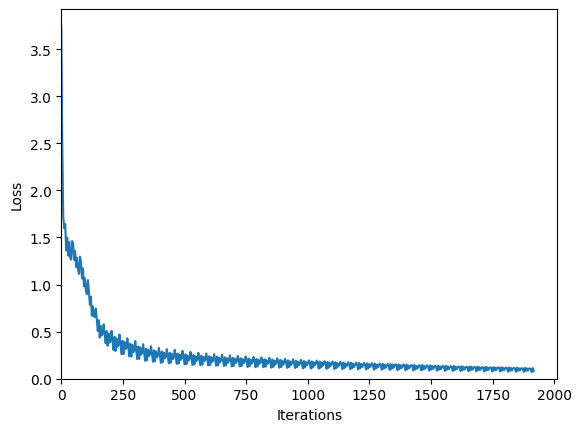

tensor([ 0.0306, -0.1247, -0.2421, -0.6155, -0.1352,  1.4947,  2.8604,  0.2005,
         0.4624, -0.2898, -0.3627, -0.1424,  1.9528,  2.5431,  0.0382, -0.0638,
        -0.1892, -0.2805, -0.0754,  1.9059,  2.8819,  0.0220, -0.2271, -0.3054,
        -0.2187,  0.0941,  2.2059,  1.0116,  0.0160, -0.2827, -0.3264, -0.4468,
         0.0947,  1.5540,  2.0423, -0.1159, -0.4091, -0.4100, -0.4118, -0.1651,
        -0.2391, -0.6724,  0.0070, -0.0143, -0.0700,  0.3140,  0.4981,  0.1923,
         0.0135], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.1587076187133789
Cell accuracy: 0.9630223274902757
Perfectness: 0.4132066033016508
Cell accuracy by type: [0.9860985945199701, 0.7728978978978979, 0.9540528075637035, 0.9499276297774126, -1, -1, -1, -1, 0.0444444444444444, -1, -1]
Cell precision by type: [0.9899709330304722, 0.8122287968441815, 0.9577521847329128, 0.9694199369236297, 0.0, 0.0, 0.0, 0.0, 1.0, -1, -1]
Epoch 	 Loss train 	 Loss test
1/20	 0.8033		 0.7102
2/20	 

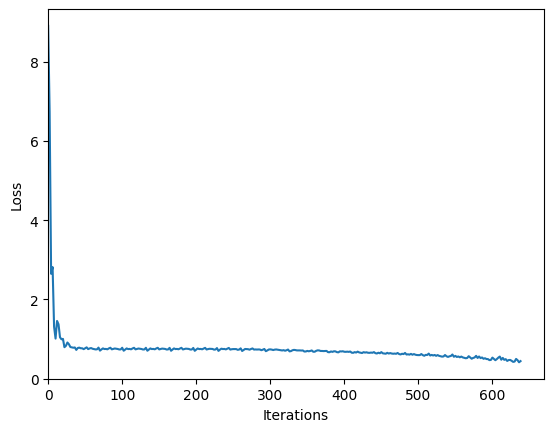

tensor([ 2.0210,  2.0795,  2.1236,  2.2782,  2.0530,  2.0784,  2.1569,  2.0790,
         2.1391, -0.1641,  4.5402,  3.5904,  2.6320,  2.5698,  3.1283,  1.9948,
         2.1190,  3.3020,  4.2315,  4.5736,  3.4829,  3.3371,  3.1634,  2.0792,
         2.1675,  2.7159,  3.6857,  3.0104,  3.2991,  3.4334,  3.2976,  2.1306,
         2.1535,  3.0573,  2.8326,  4.0856,  3.3711,  3.3749,  3.5076,  2.0511,
         2.0375,  3.2670,  4.3833,  2.4764,  3.0185,  2.8742,  2.8884,  2.1268,
         2.1128,  3.4548,  2.2576,  3.0584,  3.0044,  3.3022,  7.9647,  2.2297,
         2.1375,  2.1052,  2.1868,  1.9915,  2.1230,  2.1120,  2.1464,  2.1568],
       grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.5005214214324951
Cell accuracy: 0.8933529264632316
Perfectness: 0.0
Number of agents accuracy: 0.002501250625312701
Agent location accuracy: 1.0
Cell accuracy by type: [-1, 0.9726720647773279, 1.0, 0.8250188622302701, -1, -1, -1, -1, 1.0, -1, 0.002501250625312701]
Cell precisio

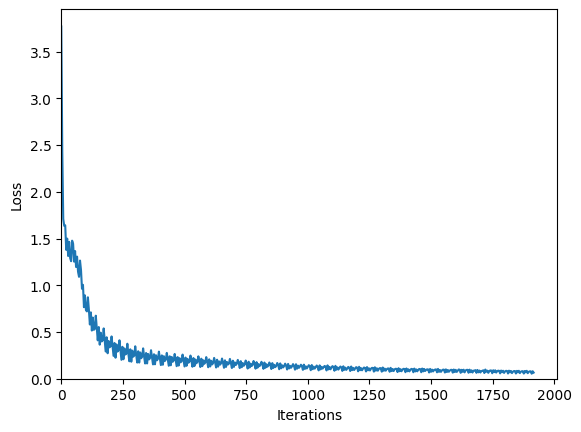


100%|██████████| 5/5 [01:32<00:00, 18.41s/it]


tensor([-4.8618e-02, -5.4199e-02, -6.0534e-02, -8.7202e-02, -3.4720e-04,
         2.1236e+00,  2.7475e+00, -9.0049e-02, -1.5892e-02, -6.9977e-02,
        -6.8967e-02,  1.6767e-01,  1.3682e+00,  2.9616e+00, -7.4996e-02,
        -1.4645e-01,  9.5364e-02, -2.6081e-02,  3.2258e-01,  1.8574e+00,
         1.7780e+00, -3.0225e-02,  2.8473e-01,  1.9130e-01,  8.2466e-03,
         2.4183e-01,  1.6605e+00,  8.5799e-01, -3.5574e-02,  5.8895e-02,
         2.8186e-01,  2.2393e-01,  1.7854e-01,  1.9743e+00,  2.1655e+00,
         1.5522e-02, -8.2149e-02,  7.1805e-02, -2.0890e-01, -9.6334e-02,
         5.6463e-01,  1.1924e-01, -4.2481e-02, -7.8732e-02, -1.0733e-02,
         2.4392e-02, -3.6931e-02, -1.1206e-01, -6.1924e-01],
       grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.14785194396972656
Cell accuracy: 0.9655235781155884
Perfectness: 0.48124062031015513
Cell accuracy by type: [0.9871531839012138, 0.8430930930930931, 0.9511702986279258, 0.9512967961506865, -1, -1, -1, 

Epoch 	 Loss train 	 Loss test
1/60	 1.3642		 1.3253
2/60	 1.2273		 1.2035
3/60	 1.0551		 1.0452
4/60	 0.8421		 0.8295
5/60	 0.6055		 0.5723
6/60	 0.4629		 0.4187
7/60	 0.3851		 0.3413
8/60	 0.3449		 0.3054
9/60	 0.3128		 0.2773
10/60	 0.2875		 0.2576
11/60	 0.2742		 0.2492
12/60	 0.2538		 0.2352
13/60	 0.2386		 0.2245
14/60	 0.2277		 0.2190
15/60	 0.2169		 0.2112
16/60	 0.2084		 0.2070
17/60	 0.2030		 0.2049
18/60	 0.1996		 0.2036
19/60	 0.1920		 0.1988
20/60	 0.1876		 0.1967
21/60	 0.1843		 0.1942
22/60	 0.1810		 0.1931
23/60	 0.1760		 0.1914
24/60	 0.1730		 0.1888
25/60	 0.1705		 0.1887
26/60	 0.1671		 0.1866
27/60	 0.1639		 0.1846
28/60	 0.1616		 0.1840
29/60	 0.1591		 0.1828
30/60	 0.1568		 0.1820
31/60	 0.1547		 0.1811
32/60	 0.1526		 0.1802
33/60	 0.1503		 0.1791
34/60	 0.1469		 0.1771
35/60	 0.1443		 0.1755
36/60	 0.1420		 0.1739
37/60	 0.1390		 0.1728
38/60	 0.1370		 0.1720
39/60	 0.1338		 0.1703
40/60	 0.1319		 0.1694
41/60	 0.1292		 0.1675
42/60	 0.1272		 0.1665
43/60	 0.124

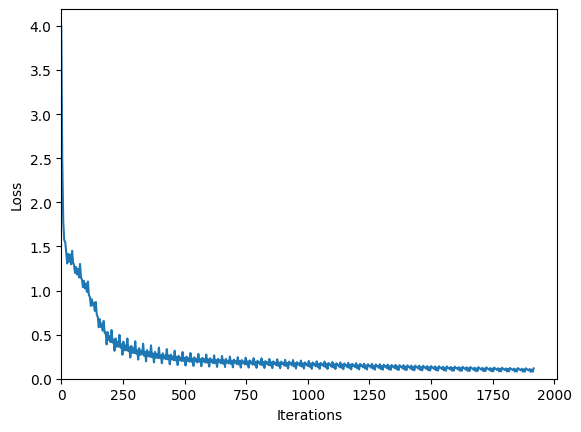

tensor([-1.5862e-02,  4.9531e-02,  8.6930e-02, -3.0060e-01,  1.7898e+00,
         2.5943e+00,  2.5810e+00, -5.7343e-02,  1.7854e-01,  2.4776e-03,
         2.1429e-01,  1.9771e+00,  3.1884e+00,  2.5097e+00, -5.8026e-02,
        -7.4013e-02, -1.1059e-01,  7.0189e-02,  1.9570e+00,  3.5511e+00,
         2.8615e+00, -9.7667e-02, -4.2824e-01, -2.2484e-01, -4.0798e-01,
         2.0531e+00,  2.9439e+00,  9.9274e-01, -1.6216e-01, -2.7758e-01,
        -2.2385e-01, -2.0486e-01,  2.2102e+00,  3.0742e+00,  2.9880e+00,
         5.0279e-03, -1.7346e-01,  2.2348e-01,  1.7495e-01,  1.5847e+00,
         2.2329e+00,  1.5872e+00, -4.7250e-02, -2.4690e-01, -2.2385e-01,
         3.1876e-03,  1.8029e-01,  3.2547e-01, -7.7910e-02],
       grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.15003444254398346
Cell accuracy: 0.9648803993833651
Perfectness: 0.3781890945472737
Cell accuracy by type: [0.9877146068286633, 0.7593406593406593, 0.9573094067893474, 0.9553802729768395, -1, -1, -1, -

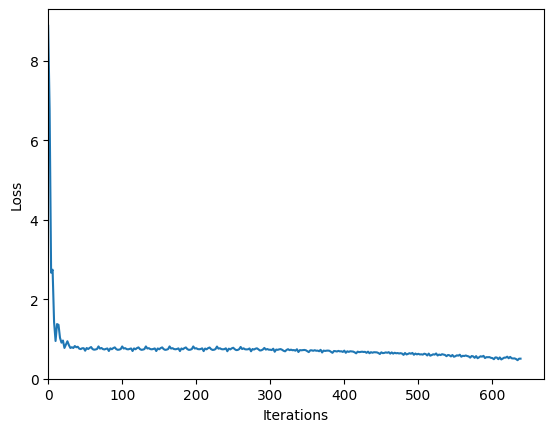

tensor([1.9251, 2.1028, 2.1537, 2.1267, 2.0343, 2.0655, 2.0174, 2.0172, 2.1326,
        0.6134, 3.5851, 3.0851, 3.0694, 2.5939, 3.1059, 1.9915, 2.0338, 4.2443,
        3.6188, 4.0067, 2.7593, 3.0298, 2.7950, 1.9151, 2.0187, 2.3357, 4.5495,
        2.8962, 3.1466, 2.7871, 3.3927, 2.1191, 2.0709, 2.8907, 2.6609, 3.5870,
        2.4021, 4.1718, 3.2427, 2.0716, 1.8782, 2.8719, 3.8805, 2.6978, 3.2008,
        2.9406, 4.1182, 2.0151, 1.9795, 4.0573, 3.7274, 3.2450, 2.9518, 2.9330,
        8.2508, 2.1090, 2.0064, 2.0765, 1.9424, 2.0437, 2.0880, 2.0648, 2.0207,
        2.0549], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.5151677131652832
Cell accuracy: 0.8911721485742872
Perfectness: 0.0030015007503751967
Number of agents accuracy: 0.012506253126563283
Agent location accuracy: 0.9994997498749375
Cell accuracy by type: [-1, 0.9093717816683831, 1.0, 0.8218421251797472, -1, -1, -1, -1, 0.9989785495403473, -1, 0.012006003001500787]
Cell precision by type: [0.0, 1.0, 0

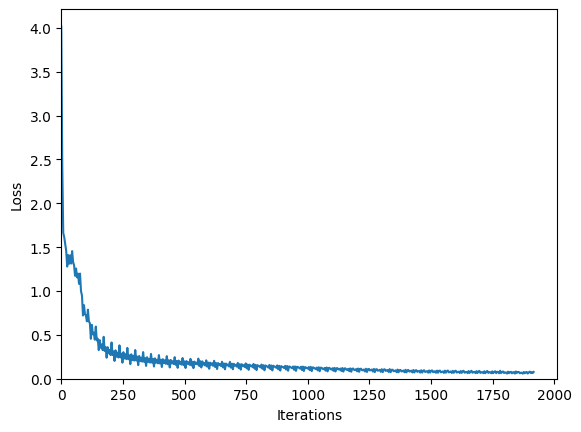


100%|██████████| 5/5 [01:22<00:00, 16.52s/it]


tensor([-0.2450,  0.0759,  0.1012, -0.5400,  1.4084,  2.5221,  2.2397,  0.0673,
        -0.2832,  0.1564, -0.1860,  1.4633,  3.2549,  2.8518, -0.0165,  0.1096,
         0.3057, -0.5339,  1.6840,  3.0357,  2.8669, -0.0505, -0.1175,  0.0354,
        -0.0956,  2.0354,  3.1763,  1.0630, -0.0128, -0.2458,  0.3828, -0.5827,
         2.0292,  2.6610,  2.2882, -0.0860, -0.1896,  0.0226,  0.5472,  1.0554,
         1.6279,  1.3036, -0.1456, -0.3072, -0.0539, -0.1854, -0.4007, -0.0061,
         0.2149], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.13803300261497498
Cell accuracy: 0.9666057518555196
Perfectness: 0.44922461230615307
Cell accuracy by type: [0.9872689222183467, 0.8084249084249084, 0.9597096811064122, 0.9546456327572207, -1, -1, -1, -1, 0.16141732283464572, -1, -1]
Cell precision by type: [0.9912063967627089, 0.8498267231420871, 0.9572479051473523, 0.9739644970414201, 0.0, 0.0, 0.0, 0.0, 0.9761904761904762, -1, -1]


Epoch 	 Loss train 	 Loss test
1/60	 1.3733		 1.3629
2/60	 1.2233		 1.2434
3/60	 1.0040		 1.0296
4/60	 0.6950		 0.7136
5/60	 0.5032		 0.5082
6/60	 0.4201		 0.4168
7/60	 0.3576		 0.3508
8/60	 0.3224		 0.3183
9/60	 0.2985		 0.2982
10/60	 0.2727		 0.2755
11/60	 0.2550		 0.2613
12/60	 0.2426		 0.2518
13/60	 0.2328		 0.2444
14/60	 0.2211		 0.2339
15/60	 0.2140		 0.2289
16/60	 0.2057		 0.2223
17/60	 0.1993		 0.2184
18/60	 0.1942		 0.2145
19/60	 0.1899		 0.2119
20/60	 0.1866		 0.2102
21/60	 0.1814		 0.2060
22/60	 0.1774		 0.2031
23/60	 0.1742		 0.2016
24/60	 0.1711		 0.1998
25/60	 0.1686		 0.1983
26/60	 0.1636		 0.1947
27/60	 0.1620		 0.1942
28/60	 0.1586		 0.1923
29/60	 0.1557		 0.1903
30/60	 0.1529		 0.1887
31/60	 0.1507		 0.1873
32/60	 0.1491		 0.1866
33/60	 0.1474		 0.1859
34/60	 0.1435		 0.1830
35/60	 0.1413		 0.1816
36/60	 0.1383		 0.1795
37/60	 0.1372		 0.1793
38/60	 0.1340		 0.1768
39/60	 0.1319		 0.1754
40/60	 0.1295		 0.1737
41/60	 0.1272		 0.1726
42/60	 0.1251		 0.1711
43/60	 0.122

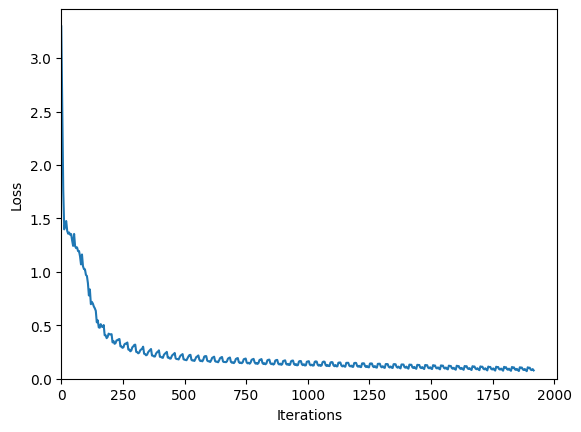

tensor([-0.2615, -0.0472, -0.0692, -0.5233, -0.1294,  2.3651,  3.3429,  0.1379,
        -0.0791,  0.4291, -0.1414, -0.2383,  2.2298,  3.6705,  0.2464, -0.0338,
         0.2799,  0.2148,  0.1074,  1.8450,  2.0332,  0.2966,  0.0910, -0.0059,
        -0.3626, -1.0665,  2.0024,  0.9108,  0.2810, -0.0201,  0.2799, -0.2001,
         0.2404,  1.9864,  1.9816,  0.2803,  0.2819,  0.2029,  0.1605,  0.6182,
         1.2405,  1.3469,  0.2387,  0.0120,  0.2295, -0.1832, -0.2083,  0.2174,
         0.9182], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.1531044989824295
Cell accuracy: 0.9608783983828649
Perfectness: 0.33416708354177094
Cell accuracy by type: [0.9856989269123881, 0.7827838827838828, 0.9563911447324508, 0.9479955093615327, -1, -1, -1, -1, 0.0570570570570571, -1, -1]
Cell precision by type: [0.9902789948847541, 0.8377107016856135, 0.9576696000891166, 0.9671543634079657, 0.0, 0.0, 0.0, 0.0, 0.95, -1, -1]
Epoch 	 Loss train 	 Loss test
1/20	 0.7972		 0.7804
2/20

In [ ]:
config_names = [i["config_name"] for i in configs]
loaded_models = {k1: {k2: {k3: None for k3 in seeds} for k2 in settings} for k1 in config_names}
processed_inputs = {k1: {k2: {k3: None for k3 in seeds} for k2 in settings} for k1 in config_names}

for setting in tqdm(settings):
    for seed in tqdm(seeds):
        for config in tqdm(configs):
            MODEL_DIR = f"trained_models/exploration_comparison_tests/{config['predictive_model_path']}/{setting}"
            METRICS_DIR = f"outputs/exploration_comparison_tests/model_evaluation/{config['predictive_model_path']}/{setting}"
            # if config["model_type"]!="inputs":
            MODEL_PATH = f"{MODEL_DIR}/{seed}_model.pt"
            METRICS_PATH = f"{METRICS_DIR}/{seed}_model.pt"
            
            Path(MODEL_DIR).mkdir(parents=True, exist_ok=True)
            Path(METRICS_DIR).mkdir(parents=True, exist_ok=True)
            image_list_train, pos_list_train, dir_list_train, image_list_test, pos_list_test, dir_list_test = loaded_data[config["observation_space"]]["color" if setting[:5] == "color" else "base"][seed]

            X_train, X_test = image_list_train, image_list_test 

            target_train = X_train[1:]
            input_train = X_train[:-1]
            target_test = X_test[1:]
            input_test = X_test[:-1]

            target_train = torch.tensor(target_train, dtype=torch.int64)
            input_train = torch.tensor(input_train, dtype=torch.int64)
            target_test = torch.tensor(target_test, dtype=torch.int64)
            input_test = torch.tensor(input_test, dtype=torch.int64)
            
            scaling_factor=1

            if config["observation_space"]=="allocentric":
                img_width, img_height = config["map_dims"][0], config["map_dims"][1]
            else:
                img_width, img_height = config["egocentric_view_size"], config["egocentric_view_size"]

            input_train_processed = torch.stack([process_input(x, 'in',img_width,img_height,scaling_factor) for x in input_train])
            input_test_processed = torch.stack([process_input(x, 'in',img_width,img_height,scaling_factor) for x in input_test])
            target_train_processed = torch.stack([process_input(x, 'out',img_width,img_height,scaling_factor) for x in target_train])
            target_test_processed = torch.stack([process_input(x, 'out',img_width,img_height,scaling_factor) for x in target_test])

            processed_inputs[config["config_name"]][setting][seed] = [input_train_processed, input_test_processed, target_train_processed, target_test_processed]

            # print(target_train_processed)
            # print(input_train_processed)

            match = re.search(r'(\d+)$', setting)
            latent_size = int(match.group(1)) 
            hidden_fac=15
            input_size=input_train_processed.size(1)
            output_size = target_train_processed.size(1)
            torch.manual_seed(config["model_seed"])
            torch.use_deterministic_algorithms(True)
            train_flag = True
            device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
            if config['model_type'] == "autoencoder_no_rnn":
                model = predictive_models.AutoencoderWithoutRNN(input_size, output_size, hidden_fac, latent_size,device)
            elif config["model_type"]=="autoencoder_rnn":
                model = predictive_models.AutoencoderWithRNN(input_size, output_size, hidden_fac, latent_size,device)
            elif config["model_type"]=="autoencoder_rnn_separate_action":
                model = predictive_models.AutoencoderRNNSeparateAction(img_width*img_height,input_size-img_width*img_height, output_size, hidden_fac, latent_size,device)
            else:
                model = predictive_models.AutoencoderInputs(img_width*img_height,device)
                train_flag = False
            n_epochs, batch_size = config['number_epochs'], config['batch_size']
            if (config["load_trained_model_if_existent"] and os.path.exists(MODEL_PATH)) and config["model_type"]!="inputs":
                try:
                    model.load_state_dict(torch.load(MODEL_PATH, map_location=device, weights_only=True))
                    print("Loaded model!")
                    with open(f"outputs/exploring_latent_space/model_evaluation/{config['config_name']}.json", "r") as f:
                        metrics = json.load(f)
                    train_flag = False
                except (RuntimeError, KeyError, EOFError) as e:
                    print("Failed to load model - will proceed to training!")
            if train_flag:
                tracked_losses_train, tracked_losses_test = runSGD(model, input_train_processed, target_train_processed, input_test_processed, target_test_processed, device=device, n_epochs=n_epochs, batch_size=batch_size,seed=config["model_seed"],notrain=(not config["train"]))
                if (config['save_trained_model']):
                    torch.save(model.state_dict(), MODEL_PATH)
                
                metrics_predict_map(None,model,config,device,scaling_factor,input_test_processed,target_test,tracked_losses_train,tracked_losses_test,outdir=METRICS_PATH,allo_width=img_width,allo_height=img_height,ego_len=img_width)
                
            loaded_models[config["config_name"]][setting][seed] = model 

#### PCA on latent space 

In [ ]:
for setting in tqdm(settings):
    for seed in tqdm(seeds[:n_seeds_for_PCA]):
        for config in tqdm(configs):
            OUT_DIR = f"outputs/exploration_comparison_tests/latent_space_PCA/{config['predictive_model_path']}/{setting}/{seed}"
            input_train_processed = processed_inputs[config["config_name"]][setting][seed]
            image_list_train, pos_list_train, dir_list_train, image_list_test, pos_list_test, dir_list_test = loaded_data[config["observation_space"]]["color" if setting[:5] == "color" else "base"][seed]
            
            latent_space_before, latent_space_after = model.get_latent(input_train_processed)

            if (config["model_type"] == "autoencoder_rnn"):
                latent_spaces = [[latent_space_before, "before_RNN"],[latent_space_after, "after_RNN"]]
            else:
                latent_spaces = [[latent_space_before, ""]]

            latent_space_PCA(latent_spaces,config,pos_list_train[:-1],dir_list_train[:-1],img_width,img_height,outdir=OUT_DIR)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

#### Training a single-layer decoder to decode latent space representaitons

In [ ]:
for setting in tqdm(settings):
    for seed in tqdm(seeds[:n_seeds_for_PCA]):
        for config in tqdm(configs):
            input_train_processed = processed_inputs[config["config_name"]][setting][seed]
            image_list_train, pos_list_train, dir_list_train, image_list_test, pos_list_test, dir_list_test = loaded_data[config["observation_space"]]["color" if setting[:5] == "color" else "base"][seed]
            if config["observation_space"]=="allocentric":
                img_width, img_height = config["map_dims"][0], config["map_dims"][1]
            else:
                img_width, img_height = config["egocentric_view_size"], config["egocentric_view_size"]
            OUT_DIR_REPR = f"outputs/exploration_comparison_tests/decode_latent_representations_1layer/{config['predictive_model_path']}/{setting}/{seed}"
            match = re.search(r'(\d+)$', setting)
            latent_size = int(match.group(1)) 
            Path(OUT_DIR_REPR).mkdir(parents=True, exist_ok=True)
            
            latent_space_before_train, latent_space_after_train = model.get_latent(input_train_processed)
            latent_space_before_test, latent_space_after_test = model.get_latent(input_test_processed)

            if (config["model_type"] == "autoencoder_rnn"):
                latent_size_repr = latent_size
                latent_representations_train = [[latent_space_before_train.detach(), "_before_RNN"],[latent_space_after_train.detach(), "_after_RNN"]]
                latent_representations_test = [[latent_space_before_test.detach(), "_before_RNN"],[latent_space_after_test.detach(), "_after_RNN"]]
            elif (config["model_type"] == "autoencoder_no_rnn"):
                latent_size_repr = latent_size
                latent_representations_train = [[latent_space_before_train.detach(), ""]]
                latent_representations_test = [[latent_space_before_test.detach(), ""]]
            elif (config["model_type"] == "autoencoder_rnn_separate_action"):
                latent_size_repr = latent_size-(input_size-img_height*img_width)
                latent_representations_train = [[latent_space_before_train.detach(), ""]]
                latent_representations_test = [[latent_space_before_test.detach(), ""]]
            elif (config["model_type"] == "inputs"):
                latent_size_repr = img_height*img_width
                latent_representations_train = [[latent_space_before_train.detach(), ""]]
                latent_representations_test = [[latent_space_before_test.detach(), ""]]

            dads = []
            for i in range(len(latent_representations_train)):
                latent_representation_train, label = latent_representations_train[i]
                latent_representation_test, label = latent_representations_test[i]
                dict_repr = {}
                for variable in config["variables_for_training_decoder"]:
                    if variable == "position":
                            target_train_repr, target_test_repr = torch.tensor(pos_list_train[:-1]).float(), torch.tensor(pos_list_test[:-1]).float()
                            decoder_model = nn.Linear(latent_size_repr,2)
                            loss_type="mse"
                            metric, metric_label, output_process = results_analysis.accuracy, "accuracy",results_analysis.round
                    elif variable == "L2_dist_center":
                        target_train_repr = torch.tensor(np.sqrt((np.array(pos_list_train)[:-1,0]-(img_width-1)/2)**2+ (np.array(pos_list_train)[:-1,1]-(img_height-1)/2)**2)).float().unsqueeze(-1)
                        target_test_repr = torch.tensor(np.sqrt((np.array(pos_list_test)[:-1,0]-(img_width-1)/2)**2+ (np.array(pos_list_test)[:-1,1]-(img_height-1)/2)**2)).float().unsqueeze(-1)
                        decoder_model = nn.Linear(latent_size_repr,1)
                        loss_type="mse"
                        metric, metric_label, output_process = results_analysis.mse, "mse",results_analysis.identity
                    elif variable == "head_direction":
                        target_train_repr, target_test_repr = torch.tensor(dir_list_train[:-1]).long().view(-1), torch.tensor(dir_list_test[:-1]).long().view(-1)
                        decoder_model = nn.Linear(latent_size_repr,4)
                        loss_type="cel"
                        metric, metric_label, output_process = results_analysis.accuracy, "accuracy", results_analysis.argmax
                    tracked_losses_train_repr, tracked_losses_test_repr = runSGD(decoder_model,latent_representation_train,target_train_repr,latent_representation_test,target_test_repr,device,criterion=loss_type,n_epochs=100,batch_size=256,shuffle=False,hide_plot=True,lr=.01)
                    output_test_repr = decoder_model(latent_representation_test)
                    output_test_repr = output_process(output_test_repr)
                    results_repr = {}
                    results_repr["name_config"] = f"{config['config_name']}{label}"
                    results_repr["name_setting"] = f"{setting}{label}"
                    results_repr["metric"] = metric(output_test_repr, target_test_repr)
                    results_repr["metric_name"] = metric_label
                    results_repr["tracked_losses_test"] = tracked_losses_test_repr
                    dict_repr[variable] = results_repr
                    print(results_repr)
                    print(decoder_model.weight.grad.abs().mean())
                    dads += [output_test_repr,target_test_repr]
                    
                with open(f"{OUT_DIR_REPR}/{label}.json", "w") as f:
                    json.dump(dict_repr, f, indent=4)


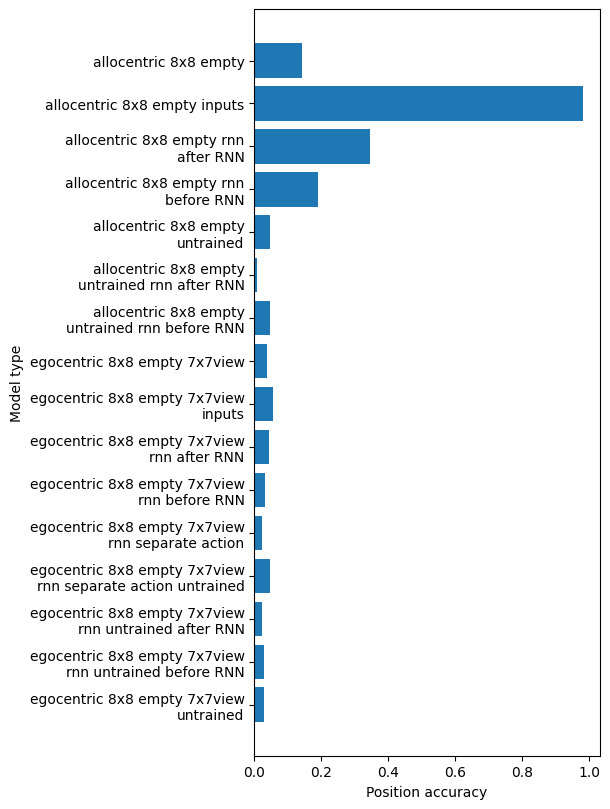

<Figure size 640x480 with 0 Axes>

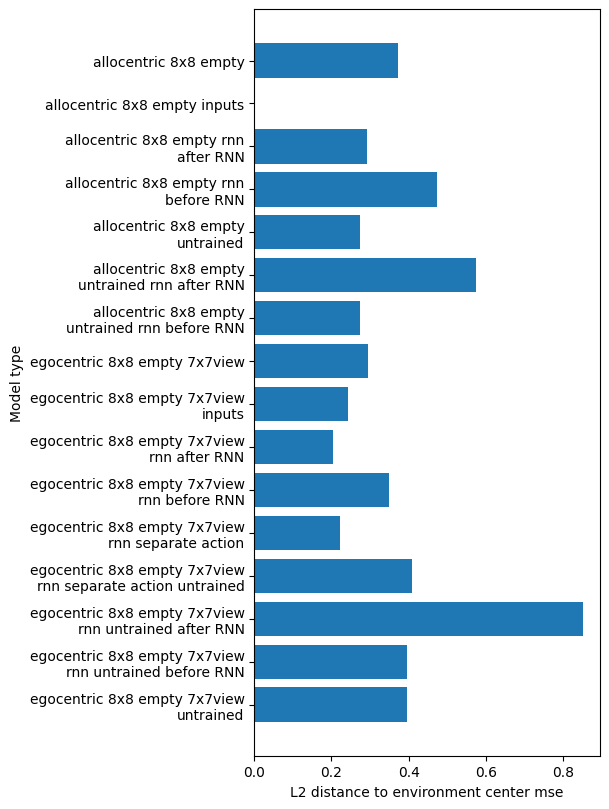

<Figure size 640x480 with 0 Axes>

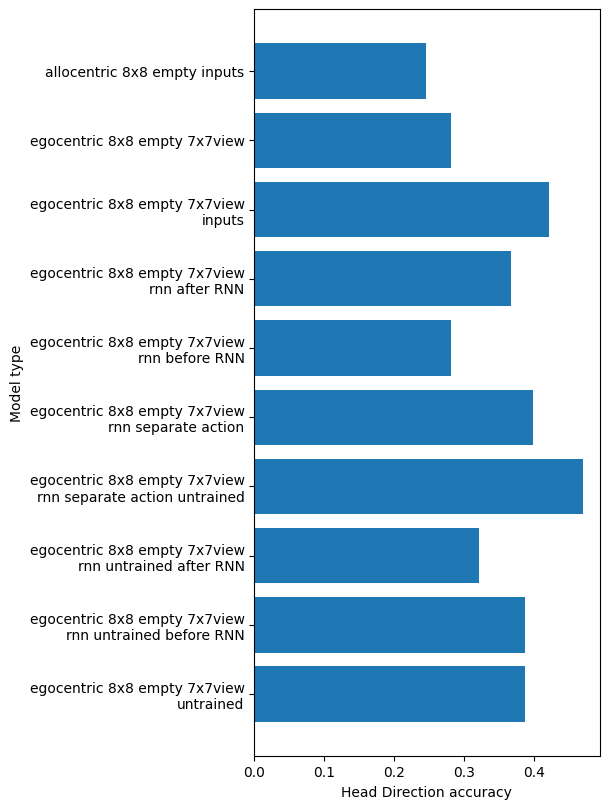

<Figure size 640x480 with 0 Axes>

In [ ]:
directory = 'outputs/exploration_comparison_tests/decode_latent_representations_1layer'
dirs_to_exclude = {"head_direction": ["allocentric_8x8_empty_rnn", "allocentric_8x8_empty_untrained_rnn","allocentric_8x8_empty_untrained","allocentric_8x8_empty.json"] }
target_vars = ["position","L2_dist_center", "head_direction"]
target_vars_labels = {"position": "Position", "L2_dist_center":"L2 distance to environment center","head_direction": "Head Direction" }

for target_var in target_vars: 
    OUT_DIR_EXP = f"outputs/exploration_comparison_tests/decode_latent_representations_1layer/{target_var}"
    Path(OUT_DIR_EXP).mkdir(parents=True, exist_ok=True)
    labels_config = {k1: {k2: None for k2 in settings} for k1 in config_names}
    labels_setting = {k1: {k2: None for k2 in settings} for k1 in config_names}
    all_values = {k1: {k2: [] for k2 in settings} for k1 in config_names}
    metric_label = ""

    for setting in sorted(os.listdir(directory),reverse=True):
        for seed in sorted(os.listdir(f"{directory}/{setting}"),reverse=True):
            for config_name in sorted(os.listdir(f"{directory}/{setting}/{seed}"),reverse=True):
                for filename in sorted(os.listdir(f"{directory}/{setting}/{seed}/{config_name}"),reverse=True):
                    if filename.endswith('.json'):
                        if (target_var in dirs_to_exclude.keys() and filename.startswith(tuple(dirs_to_exclude[target_var]))):
                            continue
                        path = os.path.join(directory, filename)
                        with open(path, 'r') as f:
                            data = json.load(f)
                            if target_var in data:
                                metric_label = data[target_var]["metric_name"]
                                all_values[config_name][setting] += [data[target_var]["metric"]]
                                labels_config[config_name][setting] = [data[target_var]["name_config"].replace("_", " ")]
                                labels_setting[config_name][setting] = [data[target_var]["name_setting"].replace("_", " ")]
    for config_name in config_names:
        labels = []
        values = []
        for setting in settings:
            labels.append(labels_setting[config_name][setting])
            values.append(all_values[config_name][setting])
        wrapped_labels = [textwrap.fill(label, width=30) for label in labels]
        plt.barh(wrapped_labels,values)
        parts = plt.violinplot(values, vert=False, showmedians=True)
        plt.yticks(range(1, len(wrapped_labels) + 1), wrapped_labels)
        plt.figure(figsize=(8, 6))
        plt.tight_layout()
        plt.ylabel('Model type')
        plt.xlabel(f"{target_vars_labels[target_var]} {metric_label}")
        plt.savefig(f"{OUT_DIR_EXP}/{config_name}.png", bbox_inches='tight')
        # plt.show()
        plt.clf()

    for setting in settings:
        labels = []
        values = []
        for config_name in config_names:
            labels.append(labels_config[config_name][setting])
            values.append(all_values[config_name][setting])
        wrapped_labels = [textwrap.fill(label, width=30) for label in labels]
        plt.barh(wrapped_labels,values)
        parts = plt.violinplot(values, vert=False, showmedians=True)
        plt.yticks(range(1, len(wrapped_labels) + 1), wrapped_labels)
        plt.figure(figsize=(8, 6))
        plt.tight_layout()
        plt.ylabel('Model type')
        plt.xlabel(f"{target_vars_labels[target_var]} {metric_label}")
        plt.savefig(f"{OUT_DIR_EXP}/{setting}.png", bbox_inches='tight')
        # plt.show()
        plt.clf()
